In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
df=pd.read_csv(r"C:\Users\KIIT\Downloads\peakflo.csv")

In [4]:
pd.set_option('display.float_format', '{:.6f}'.format)
warnings.filterwarnings("ignore")

In [5]:
df.dropna(inplace=True)

In [6]:
from datetime import datetime

df['issue_date'] = pd.to_datetime(df['issue_date'])
df['due_date'] = pd.to_datetime(df['due_date'])
df['paid_on_date'] = pd.to_datetime(df['paid_on_date'])


df['paid_on_date'] = pd.to_datetime(df['paid_on_date']).dt.date
df['due_date'] = pd.to_datetime(df['due_date']).dt.date
df['issue_date'] = pd.to_datetime(df['issue_date']).dt.date

df.head()

id  total_amount  amount_due  issue_date    due_date paid_on_date  \
0   1       1720329    0.000000  2021-11-01  2021-12-31   2022-08-22   
1   2       1560727    0.000000  2021-11-01  2021-12-01   2021-12-04   
2   3        149600    0.000000  2021-11-01  2022-02-14   2022-02-22   
3   4        149600    0.000000  2021-11-01  2022-02-14   2022-02-22   
4   5        149600    0.000000  2021-11-01  2022-02-14   2022-02-22   

               payer_id  
0  pKey9MQ59wyF6GhjWM5p  
1  Ed9wuAC3RlOfWkENchdD  
2  bPBZIvFiIE1ZbZjvuYm7  
3  bPBZIvFiIE1ZbZjvuYm7  
4  bPBZIvFiIE1ZbZjvuYm7

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12929 entries, 0 to 17690
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            12929 non-null  int64  
 1   total_amount  12929 non-null  int64  
 2   amount_due    12929 non-null  float64
 3   issue_date    12929 non-null  object 
 4   due_date      12929 non-null  object 
 5   paid_on_date  12929 non-null  object 
 6   payer_id      12929 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 808.1+ KB


In [8]:
df['issue_date'] = pd.to_datetime(df['issue_date'])
df['due_date'] = pd.to_datetime(df['due_date'])
df['paid_on_date'] = pd.to_datetime(df['paid_on_date'])

df['amount'] = df.groupby(df['paid_on_date'].dt.date)['total_amount'].transform('sum')
df.head()

id  total_amount  amount_due issue_date   due_date paid_on_date  \
0   1       1720329    0.000000 2021-11-01 2021-12-31   2022-08-22   
1   2       1560727    0.000000 2021-11-01 2021-12-01   2021-12-04   
2   3        149600    0.000000 2021-11-01 2022-02-14   2022-02-22   
3   4        149600    0.000000 2021-11-01 2022-02-14   2022-02-22   
4   5        149600    0.000000 2021-11-01 2022-02-14   2022-02-22   

               payer_id    amount  
0  pKey9MQ59wyF6GhjWM5p  20390909  
1  Ed9wuAC3RlOfWkENchdD   1560727  
2  bPBZIvFiIE1ZbZjvuYm7  15333392  
3  bPBZIvFiIE1ZbZjvuYm7  15333392  
4  bPBZIvFiIE1ZbZjvuYm7  15333392

In [9]:
df = pd.DataFrame({
    'paid_on_date': df['paid_on_date'].dt.date.unique(),
    'amount': df.groupby(df['paid_on_date'].dt.date)['amount'].max().reset_index(drop=True)
})

In [10]:
df_lstm=df.copy()

In [11]:
df=df.sort_values(by='paid_on_date')

In [12]:
df.set_index('paid_on_date', inplace=True)

In [13]:
df.index = pd.to_datetime(df.index)

In [14]:
pd.date_range(start='2021-11-23',periods=len(df.index),freq='D')

DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-27', '2021-11-28', '2021-11-29', '2021-11-30',
               '2021-12-01', '2021-12-02',
               ...
               '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
               '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21',
               '2022-09-22', '2022-09-23'],
              dtype='datetime64[ns]', length=305, freq='D')

In [15]:
def plot(df):
    plt.figure(figsize=(20, 10))
    plt.plot(df)
    plt.title('Monthly Revenue Amount Trend')
    plt.xlabel('Paid On Date')
    plt.ylabel('Amount')
    plt.xticks(rotation=45, ha='right')
    
    plt.xlim(df.index.min(), df.index.max())
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

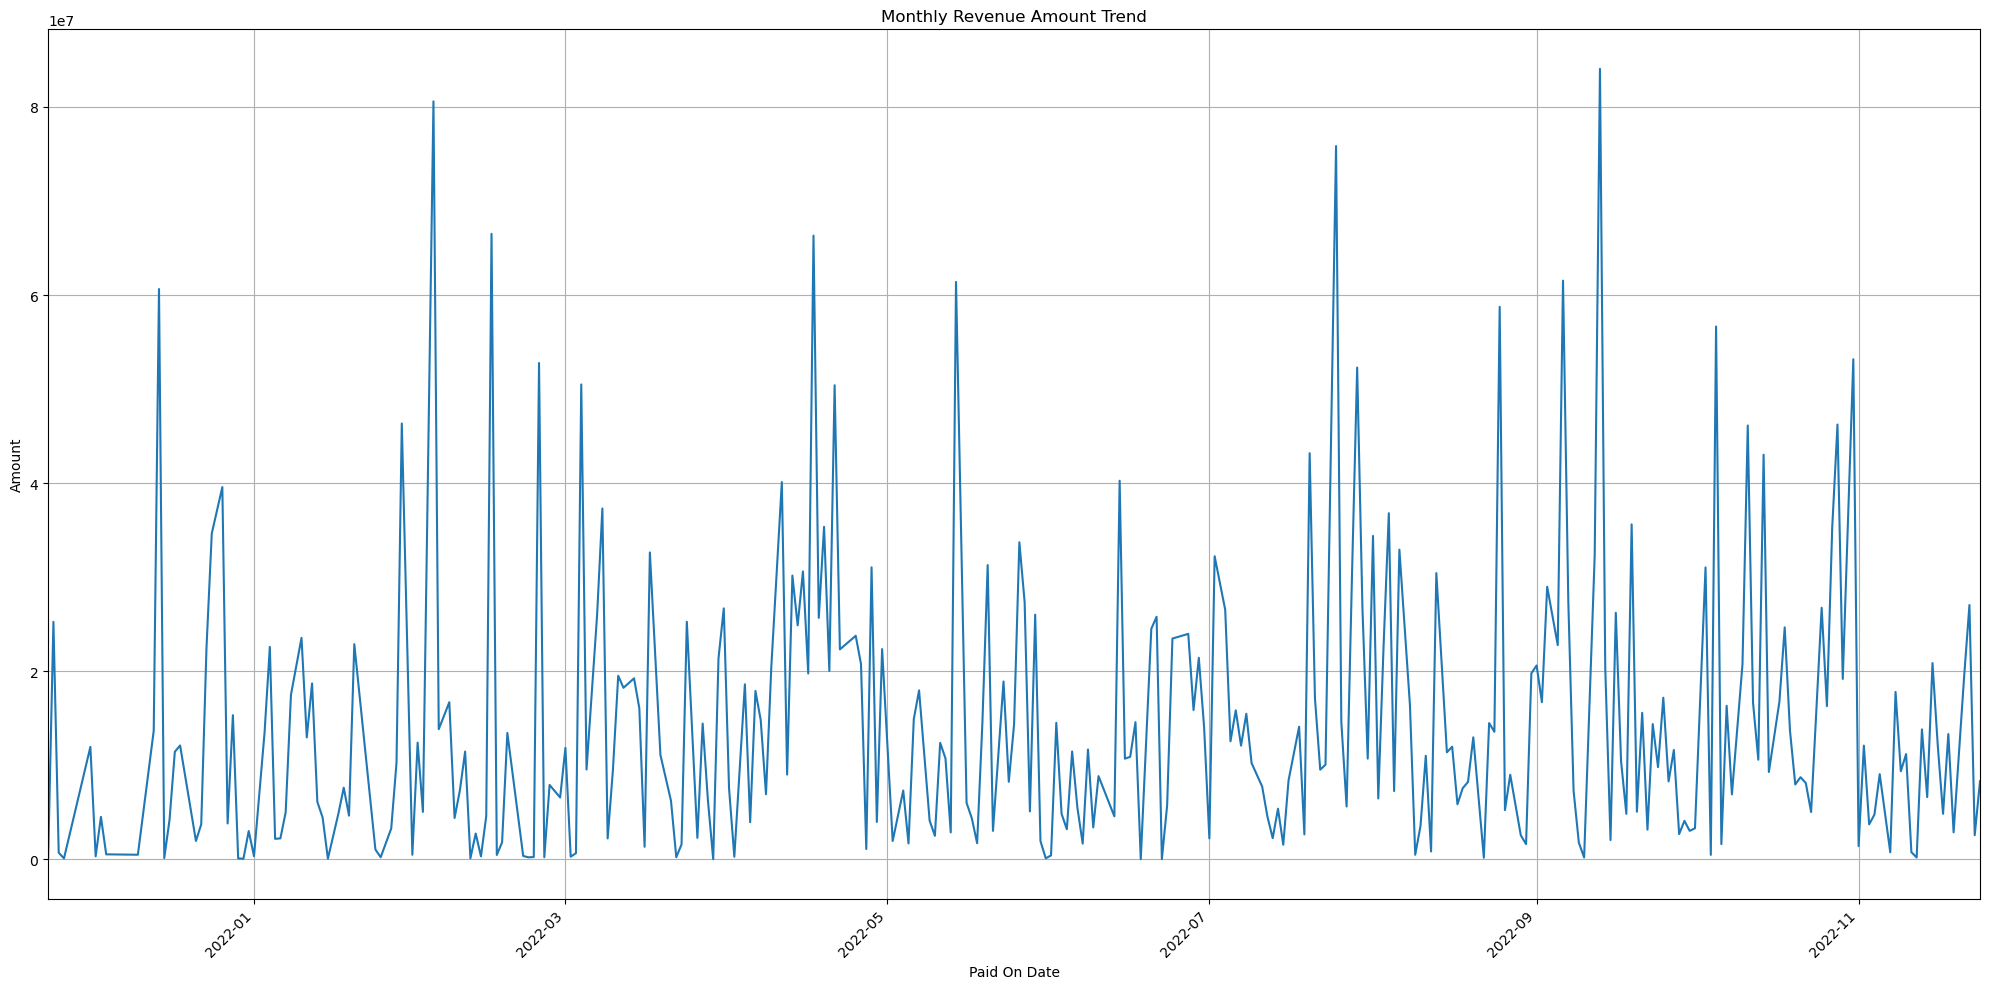

In [16]:
plot(df)

# Trying LSTM, Long Short term memory, High level RNN framework

In [166]:
df_lstm.tail()

paid_on_date    amount
300   2022-10-22   8112591
301   2022-10-05  56662516
302   2022-10-26  16297005
303   2022-09-18   4845339
304   2022-09-25  17190505

In [167]:
data = df_lstm.filter(['amount'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .75 ))

training_data_len

229

In [168]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

scaled_data

array([[1.87515904e-03],
       [6.15309690e-03],
       [2.37813293e-03],
       [6.64463443e-04],
       [9.04971719e-02],
       [4.10176312e-03],
       [1.03199795e-03],
       [1.83215307e-02],
       [2.47663322e-03],
       [5.66564123e-03],
       [1.06414115e-03],
       [1.97085201e-02],
       [1.15650079e-03],
       [4.52102069e-02],
       [2.50870502e-03],
       [1.99268344e-02],
       [6.66551264e-02],
       [5.92928214e-02],
       [2.62563679e-02],
       [2.72274710e-03],
       [4.87883964e-02],
       [3.89233248e-02],
       [2.02341049e-02],
       [8.19213748e-03],
       [1.07021040e-03],
       [5.51025782e-02],
       [1.57149323e-02],
       [1.14211311e-03],
       [3.51882988e-03],
       [7.61447616e-03],
       [1.22972446e-02],
       [3.65461439e-03],
       [6.04966981e-02],
       [5.61079191e-03],
       [5.35386525e-02],
       [1.42906945e-03],
       [1.36223550e-01],
       [1.35970725e-01],
       [4.40974523e-02],
       [3.53685971e-01],


In [169]:
sequence_length = 60   #Using data of previous 60 days

x_train = []
y_train = []

for i in range(sequence_length, len(scaled_data)):
    x_train.append(scaled_data[i - sequence_length:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print("x_train:")
print(x_train)
print("\ny_train:")
print(y_train)

x_train:
[[[1.87515904e-03]
  [6.15309690e-03]
  [2.37813293e-03]
  ...
  [2.28939698e-02]
  [2.14831081e-03]
  [5.98661748e-02]]

 [[6.15309690e-03]
  [2.37813293e-03]
  [6.64463443e-04]
  ...
  [2.14831081e-03]
  [5.98661748e-02]
  [1.91093807e-01]]

 [[2.37813293e-03]
  [6.64463443e-04]
  [9.04971719e-02]
  ...
  [5.98661748e-02]
  [1.91093807e-01]
  [1.31810590e-01]]

 ...

 [[2.54733256e-01]
  [1.72560853e-01]
  [8.90054940e-03]
  ...
  [1.64235799e-01]
  [9.62918739e-02]
  [6.74059409e-01]]

 [[1.72560853e-01]
  [8.90054940e-03]
  [1.03748954e-01]
  ...
  [9.62918739e-02]
  [6.74059409e-01]
  [1.93690350e-01]]

 [[8.90054940e-03]
  [1.03748954e-01]
  [1.94082697e-01]
  ...
  [6.74059409e-01]
  [1.93690350e-01]
  [5.74099985e-02]]]

y_train:
[1.91093807e-01 1.31810590e-01 5.36502314e-03 7.42662347e-02
 4.78855246e-01 1.82222890e-01 7.80675582e-02 3.00342379e-01
 4.12220410e-01 2.31096304e-02 1.43900278e-01 6.20817947e-02
 2.12867775e-01 2.85106644e-01 1.54081545e-01 2.68612384e-01

In [170]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=32, epochs=500)

Epoch 1/500
8/8 [==============================] - 3s 63ms/step - loss: 0.0425
Epoch 2/500
8/8 [==============================] - 0s 62ms/step - loss: 0.0389
Epoch 3/500
8/8 [==============================] - 0s 60ms/step - loss: 0.0380
Epoch 4/500
8/8 [==============================] - 1s 61ms/step - loss: 0.0364
Epoch 5/500
8/8 [==============================] - 1s 62ms/step - loss: 0.0368
Epoch 6/500
8/8 [==============================] - 0s 62ms/step - loss: 0.0361
Epoch 7/500
8/8 [==============================] - 1s 67ms/step - loss: 0.0355
Epoch 8/500
8/8 [==============================] - 1s 62ms/step - loss: 0.0356
Epoch 9/500
8/8 [==============================] - 1s 64ms/step - loss: 0.0352
Epoch 10/500
8/8 [==============================] - 1s 64ms/step - loss: 0.0354
Epoch 11/500
8/8 [==============================] - 1s 77ms/step - loss: 0.0353
Epoch 12/500
8/8 [==============================] - 1s 133ms/step - loss: 0.0354
Epoch 13/500
8/8 [==============================

8/8 [==============================] - 1s 127ms/step - loss: 0.0236
Epoch 203/500
8/8 [==============================] - 1s 153ms/step - loss: 0.0216
Epoch 204/500
8/8 [==============================] - 1s 128ms/step - loss: 0.0215
Epoch 205/500
8/8 [==============================] - 1s 109ms/step - loss: 0.0213
Epoch 206/500
8/8 [==============================] - 1s 115ms/step - loss: 0.0218
Epoch 207/500
8/8 [==============================] - 1s 109ms/step - loss: 0.0221
Epoch 208/500
8/8 [==============================] - 1s 116ms/step - loss: 0.0215
Epoch 209/500
8/8 [==============================] - 1s 115ms/step - loss: 0.0197
Epoch 210/500
8/8 [==============================] - 1s 102ms/step - loss: 0.0194
Epoch 211/500
8/8 [==============================] - 1s 119ms/step - loss: 0.0205
Epoch 212/500
8/8 [==============================] - 1s 123ms/step - loss: 0.0214
Epoch 213/500
8/8 [==============================] - 1s 115ms/step - loss: 0.0198
Epoch 214/500
8/8 [===========

8/8 [==============================] - 1s 139ms/step - loss: 0.0053
Epoch 303/500
8/8 [==============================] - 1s 122ms/step - loss: 0.0053
Epoch 304/500
8/8 [==============================] - 1s 129ms/step - loss: 0.0055
Epoch 305/500
8/8 [==============================] - 1s 118ms/step - loss: 0.0054
Epoch 306/500
8/8 [==============================] - 1s 113ms/step - loss: 0.0063
Epoch 307/500
8/8 [==============================] - 1s 102ms/step - loss: 0.0063
Epoch 308/500
8/8 [==============================] - 1s 133ms/step - loss: 0.0098
Epoch 309/500
8/8 [==============================] - 1s 115ms/step - loss: 0.0084
Epoch 310/500
8/8 [==============================] - 1s 108ms/step - loss: 0.0084
Epoch 311/500
8/8 [==============================] - 1s 128ms/step - loss: 0.0091
Epoch 312/500
8/8 [==============================] - 1s 127ms/step - loss: 0.0076
Epoch 313/500
8/8 [==============================] - 1s 118ms/step - loss: 0.0066
Epoch 314/500
8/8 [===========

8/8 [==============================] - 1s 118ms/step - loss: 0.0013
Epoch 403/500
8/8 [==============================] - 1s 106ms/step - loss: 0.0014
Epoch 404/500
8/8 [==============================] - 1s 106ms/step - loss: 0.0018
Epoch 405/500
8/8 [==============================] - 1s 119ms/step - loss: 0.0019
Epoch 406/500
8/8 [==============================] - 1s 115ms/step - loss: 0.0023
Epoch 407/500
8/8 [==============================] - 1s 109ms/step - loss: 0.0027
Epoch 408/500
8/8 [==============================] - 1s 101ms/step - loss: 0.0031
Epoch 409/500
8/8 [==============================] - 1s 116ms/step - loss: 0.0031
Epoch 410/500
8/8 [==============================] - 1s 122ms/step - loss: 0.0024
Epoch 411/500
8/8 [==============================] - 1s 115ms/step - loss: 0.0024
Epoch 412/500
8/8 [==============================] - 1s 104ms/step - loss: 0.0018
Epoch 413/500
8/8 [==============================] - 1s 118ms/step - loss: 0.0017
Epoch 414/500
8/8 [===========

In [171]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [172]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3/3 [==============================] - 1s 32ms/step


3004925.113304559

In [173]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid

amount     Predictions
229   4098830  6694709.000000
230  16781702 17978822.000000
231  20738034 16335682.000000
232   9375317 10370679.000000
233  43027220 37996660.000000
..        ...             ...
300   8112591 15672835.000000
301  56662516 57979468.000000
302  16297005 16388975.000000
303   4845339  2075935.875000
304  17190505 14827187.000000

[76 rows x 2 columns]

In [174]:
valid.sample(10)

amount     Predictions
240  30615941 27960332.000000
242  21426453 21719486.000000
255  84051371 83293144.000000
270  10235051 12389484.000000
229   4098830  6694709.000000
304  17190505 14827187.000000
291  35619625 35887820.000000
251    840564  1237746.875000
233  43027220 37996660.000000
239   7750737  7541313.500000

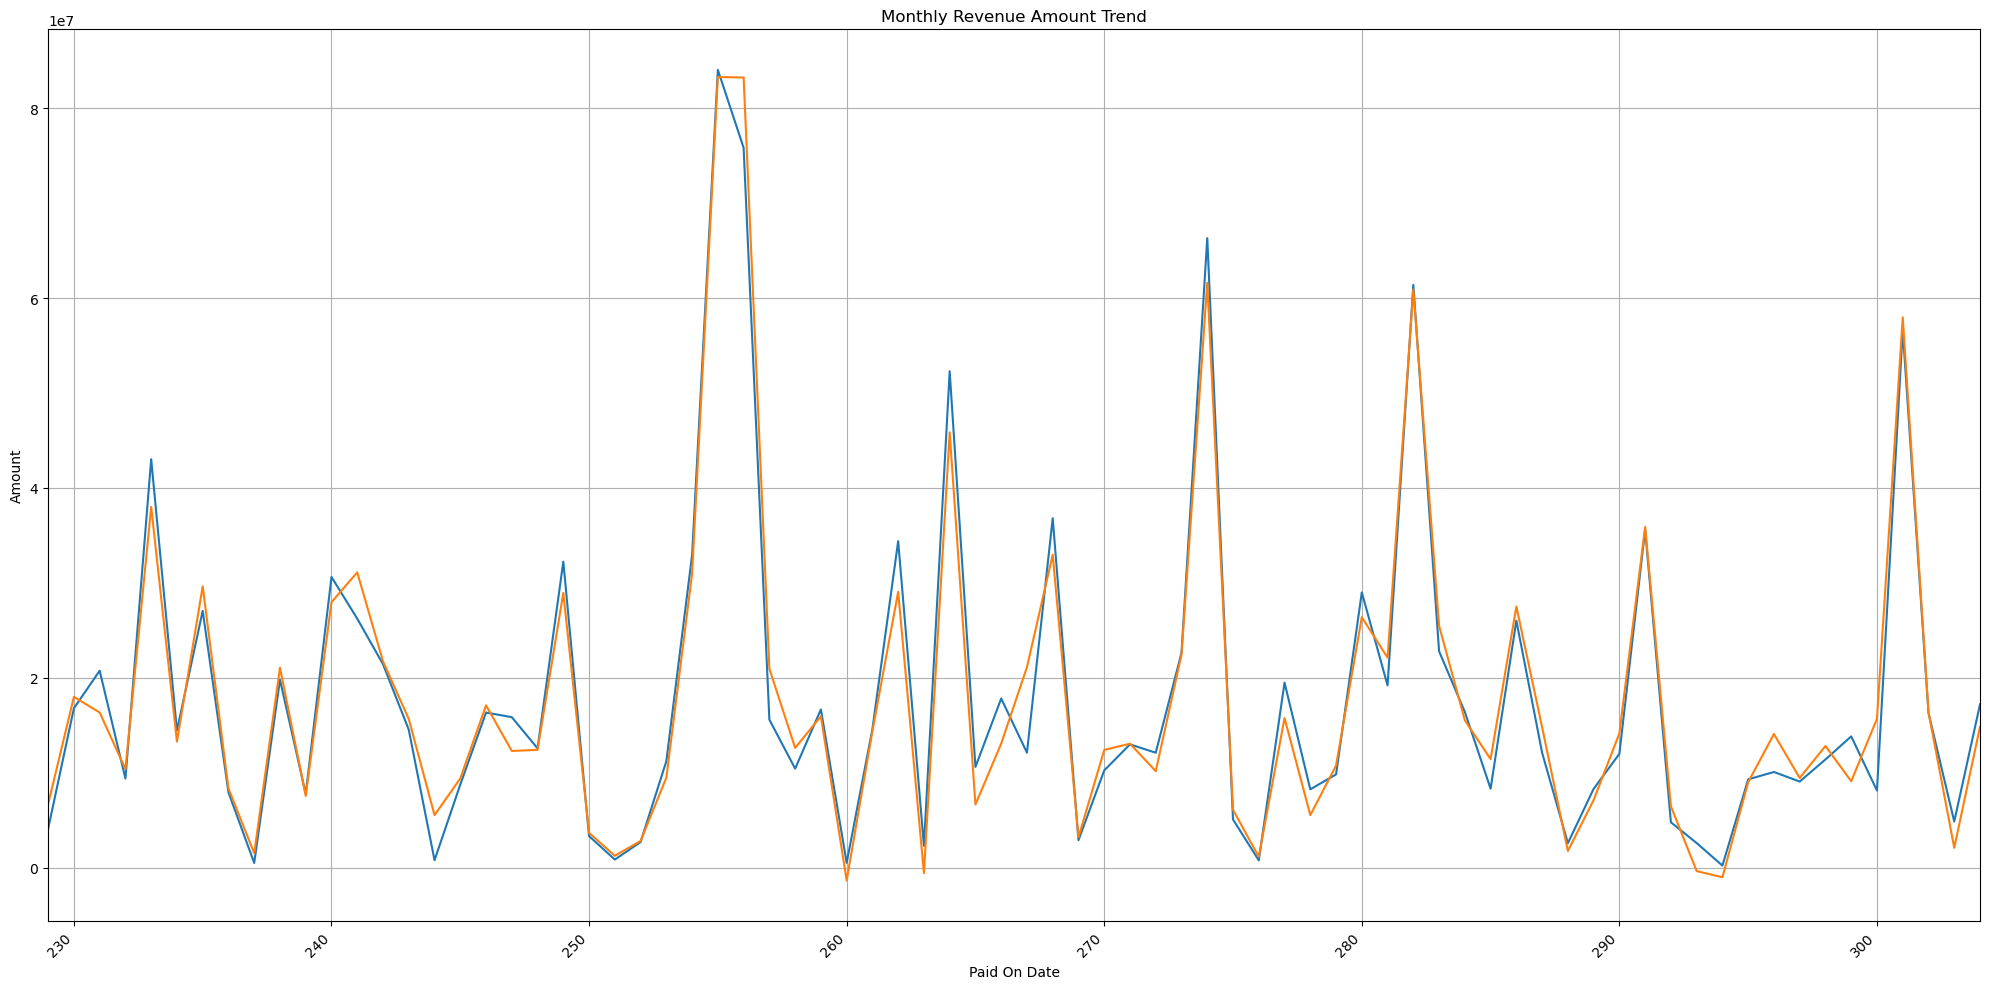

In [175]:
plot(valid)

In [176]:
len(test_data)

136

In [177]:
x_input=test_data[46:].reshape(1,-1)
x_input.shape

(1, 90)

In [178]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [179]:
temp_input

[0.02658256008559589,
 0.09454876261995597,
 0.15839406605762696,
 0.06498174001858331,
 0.10681305481983466,
 0.24240978297732604,
 0.16122560737266312,
 0.36918400509454896,
 0.5487453166543469,
 0.1671599377014499,
 0.03248190299569181,
 0.17338435419282444,
 0.2933180004342724,
 0.05970185292655358,
 0.048526181168709735,
 0.19945847806204356,
 0.24654073798176815,
 0.111318922626466,
 0.5117928069818133,
 0.17162742645186424,
 0.3216171337245085,
 0.09394781205225178,
 0.005473031923782265,
 0.23518187019558182,
 0.09198563668878784,
 0.364092597845113,
 0.3118020798378145,
 0.25473325627691545,
 0.17256085270099183,
 0.008900549404817595,
 0.1037489542748473,
 0.19408269688164279,
 0.18832136386765494,
 0.14917771354743556,
 0.38332897815340355,
 0.03915747868094004,
 0.009751243499272155,
 0.031748345350956296,
 0.13304557411176643,
 0.3916974212820566,
 1.0,
 0.9023025601055887,
 0.18522290662955176,
 0.123774312775099,
 0.19804542666478767,
 0.0056127197879295935,
 0.173320496

In [180]:
from numpy import array
#Logic to predict for next 3 months (90 days)
lst_output = []
n_steps = 90
i = 0
while i < 90:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[-n_steps:])
        print("{}th day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{}th day output {}".format(i, yhat[0, 0]))
        temp_input.append(yhat[0, 0])
        lst_output.append(yhat[0, 0])  # Appending the predicted value to lst_output
        i += 1
    else:
        x_input = np.array(temp_input).reshape(1, len(temp_input), 1)
        yhat = model.predict(x_input, verbose=0)
        print("{}th day output {}".format(i, yhat[0, 0]))
        temp_input.append(yhat[0, 0])
        lst_output.append(yhat[0, 0])  # Appending the predicted value to lst_output
        i += 1

print(lst_output)

0th day input [0.02658256 0.09454876 0.15839407 0.06498174 0.10681305 0.24240978
 0.16122561 0.36918401 0.54874532 0.16715994 0.0324819  0.17338435
 0.293318   0.05970185 0.04852618 0.19945848 0.24654074 0.11131892
 0.51179281 0.17162743 0.32161713 0.09394781 0.00547303 0.23518187
 0.09198564 0.3640926  0.31180208 0.25473326 0.17256085 0.00890055
 0.10374895 0.1940827  0.18832136 0.14917771 0.38332898 0.03915748
 0.00975124 0.03174835 0.13304557 0.39169742 1.         0.90230256
 0.18522291 0.12377431 0.19804543 0.00561272 0.1733205  0.4090341
 0.02700221 0.62209211 0.12587314 0.21168271 0.14380365 0.43778467
 0.03401953 0.12155017 0.15421118 0.14371488 0.26899484 0.7889778
 0.0600547  0.00874644 0.23166574 0.09780341 0.11651073 0.34474475
 0.22810075 0.73041825 0.27088888 0.19482964 0.0986335  0.30941405
 0.14372664 0.03025918 0.09841066 0.14234993 0.42363885 0.05644082
 0.03044014 0.00218999 0.11032407 0.11954995 0.10759602 0.13523109
 0.1642358  0.09629187 0.67405941 0.19369035 0.057

8th day output 0.22043192386627197
9th day input [0.16715994 0.0324819  0.17338435 0.293318   0.05970185 0.04852618
 0.19945848 0.24654074 0.11131892 0.51179281 0.17162743 0.32161713
 0.09394781 0.00547303 0.23518187 0.09198564 0.3640926  0.31180208
 0.25473326 0.17256085 0.00890055 0.10374895 0.1940827  0.18832136
 0.14917771 0.38332898 0.03915748 0.00975124 0.03174835 0.13304557
 0.39169742 1.         0.90230256 0.18522291 0.12377431 0.19804543
 0.00561272 0.1733205  0.4090341  0.02700221 0.62209211 0.12587314
 0.21168271 0.14380365 0.43778467 0.03401953 0.12155017 0.15421118
 0.14371488 0.26899484 0.7889778  0.0600547  0.00874644 0.23166574
 0.09780341 0.11651073 0.34474475 0.22810075 0.73041825 0.27088888
 0.19482964 0.0986335  0.30941405 0.14372664 0.03025918 0.09841066
 0.14234993 0.42363885 0.05644082 0.03044014 0.00218999 0.11032407
 0.11954995 0.10759602 0.13523109 0.1642358  0.09629187 0.67405941
 0.19369035 0.05741    0.20432343 0.25694266 0.17984079 0.10496798
 0.12009664 0

16th day output 0.019942957907915115
17th day input [0.11131892 0.51179281 0.17162743 0.32161713 0.09394781 0.00547303
 0.23518187 0.09198564 0.3640926  0.31180208 0.25473326 0.17256085
 0.00890055 0.10374895 0.1940827  0.18832136 0.14917771 0.38332898
 0.03915748 0.00975124 0.03174835 0.13304557 0.39169742 1.
 0.90230256 0.18522291 0.12377431 0.19804543 0.00561272 0.1733205
 0.4090341  0.02700221 0.62209211 0.12587314 0.21168271 0.14380365
 0.43778467 0.03401953 0.12155017 0.15421118 0.14371488 0.26899484
 0.7889778  0.0600547  0.00874644 0.23166574 0.09780341 0.11651073
 0.34474475 0.22810075 0.73041825 0.27088888 0.19482964 0.0986335
 0.30941405 0.14372664 0.03025918 0.09841066 0.14234993 0.42363885
 0.05644082 0.03044014 0.00218999 0.11032407 0.11954995 0.10759602
 0.13523109 0.1642358  0.09629187 0.67405941 0.19369035 0.05741
 0.20432343 0.25694266 0.17984079 0.10496798 0.12009664 0.28639182
 0.50871766 0.54980004 0.37235111 0.22043192 0.19564909 0.07068808
 0.07425548 0.05506501 

25th day output 0.2712033689022064
26th day input [0.31180208 0.25473326 0.17256085 0.00890055 0.10374895 0.1940827
 0.18832136 0.14917771 0.38332898 0.03915748 0.00975124 0.03174835
 0.13304557 0.39169742 1.         0.90230256 0.18522291 0.12377431
 0.19804543 0.00561272 0.1733205  0.4090341  0.02700221 0.62209211
 0.12587314 0.21168271 0.14380365 0.43778467 0.03401953 0.12155017
 0.15421118 0.14371488 0.26899484 0.7889778  0.0600547  0.00874644
 0.23166574 0.09780341 0.11651073 0.34474475 0.22810075 0.73041825
 0.27088888 0.19482964 0.0986335  0.30941405 0.14372664 0.03025918
 0.09841066 0.14234993 0.42363885 0.05644082 0.03044014 0.00218999
 0.11032407 0.11954995 0.10759602 0.13523109 0.1642358  0.09629187
 0.67405941 0.19369035 0.05741    0.20432343 0.25694266 0.17984079
 0.10496798 0.12009664 0.28639182 0.50871766 0.54980004 0.37235111
 0.22043192 0.19564909 0.07068808 0.07425548 0.05506501 0.19516888
 0.80430579 0.58259332 0.01994296 0.0200909  0.09594616 0.10791464
 0.22481    0

33th day output 0.2526513934135437
34th day input [0.38332898 0.03915748 0.00975124 0.03174835 0.13304557 0.39169742
 1.         0.90230256 0.18522291 0.12377431 0.19804543 0.00561272
 0.1733205  0.4090341  0.02700221 0.62209211 0.12587314 0.21168271
 0.14380365 0.43778467 0.03401953 0.12155017 0.15421118 0.14371488
 0.26899484 0.7889778  0.0600547  0.00874644 0.23166574 0.09780341
 0.11651073 0.34474475 0.22810075 0.73041825 0.27088888 0.19482964
 0.0986335  0.30941405 0.14372664 0.03025918 0.09841066 0.14234993
 0.42363885 0.05644082 0.03044014 0.00218999 0.11032407 0.11954995
 0.10759602 0.13523109 0.1642358  0.09629187 0.67405941 0.19369035
 0.05741    0.20432343 0.25694266 0.17984079 0.10496798 0.12009664
 0.28639182 0.50871766 0.54980004 0.37235111 0.22043192 0.19564909
 0.07068808 0.07425548 0.05506501 0.19516888 0.80430579 0.58259332
 0.01994296 0.0200909  0.09594616 0.10791464 0.22481    0.25415969
 0.17339122 0.35805973 0.20649844 0.27120337 0.15112151 0.19669759
 0.16417935 

43th day output 0.22468629479408264
44th day input [ 0.19804543  0.00561272  0.1733205   0.4090341   0.02700221  0.62209211
  0.12587314  0.21168271  0.14380365  0.43778467  0.03401953  0.12155017
  0.15421118  0.14371488  0.26899484  0.7889778   0.0600547   0.00874644
  0.23166574  0.09780341  0.11651073  0.34474475  0.22810075  0.73041825
  0.27088888  0.19482964  0.0986335   0.30941405  0.14372664  0.03025918
  0.09841066  0.14234993  0.42363885  0.05644082  0.03044014  0.00218999
  0.11032407  0.11954995  0.10759602  0.13523109  0.1642358   0.09629187
  0.67405941  0.19369035  0.05741     0.20432343  0.25694266  0.17984079
  0.10496798  0.12009664  0.28639182  0.50871766  0.54980004  0.37235111
  0.22043192  0.19564909  0.07068808  0.07425548  0.05506501  0.19516888
  0.80430579  0.58259332  0.01994296  0.0200909   0.09594616  0.10791464
  0.22481     0.25415969  0.17339122  0.35805973  0.20649844  0.27120337
  0.15112151  0.19669759  0.16417935  0.11857098  0.23253445  0.38153684


52th day output 0.26663392782211304
53th day input [ 0.43778467  0.03401953  0.12155017  0.15421118  0.14371488  0.26899484
  0.7889778   0.0600547   0.00874644  0.23166574  0.09780341  0.11651073
  0.34474475  0.22810075  0.73041825  0.27088888  0.19482964  0.0986335
  0.30941405  0.14372664  0.03025918  0.09841066  0.14234993  0.42363885
  0.05644082  0.03044014  0.00218999  0.11032407  0.11954995  0.10759602
  0.13523109  0.1642358   0.09629187  0.67405941  0.19369035  0.05741
  0.20432343  0.25694266  0.17984079  0.10496798  0.12009664  0.28639182
  0.50871766  0.54980004  0.37235111  0.22043192  0.19564909  0.07068808
  0.07425548  0.05506501  0.19516888  0.80430579  0.58259332  0.01994296
  0.0200909   0.09594616  0.10791464  0.22481     0.25415969  0.17339122
  0.35805973  0.20649844  0.27120337  0.15112151  0.19669759  0.16417935
  0.11857098  0.23253445  0.38153684  0.41825169  0.25265139  0.12786372
  0.05818024  0.01412107  0.17219563  0.39312613  0.55515313  0.3335382
 -0.0

61th day output 0.27160871028900146
62th day input [ 0.23166574  0.09780341  0.11651073  0.34474475  0.22810075  0.73041825
  0.27088888  0.19482964  0.0986335   0.30941405  0.14372664  0.03025918
  0.09841066  0.14234993  0.42363885  0.05644082  0.03044014  0.00218999
  0.11032407  0.11954995  0.10759602  0.13523109  0.1642358   0.09629187
  0.67405941  0.19369035  0.05741     0.20432343  0.25694266  0.17984079
  0.10496798  0.12009664  0.28639182  0.50871766  0.54980004  0.37235111
  0.22043192  0.19564909  0.07068808  0.07425548  0.05506501  0.19516888
  0.80430579  0.58259332  0.01994296  0.0200909   0.09594616  0.10791464
  0.22481     0.25415969  0.17339122  0.35805973  0.20649844  0.27120337
  0.15112151  0.19669759  0.16417935  0.11857098  0.23253445  0.38153684
  0.41825169  0.25265139  0.12786372  0.05818024  0.01412107  0.17219563
  0.39312613  0.55515313  0.3335382  -0.01293085  0.00183775  0.22468629
  0.11198854  0.06131979  0.13135706  0.36063054  0.52058005  0.27911913


70th day output 0.16246511042118073
71th day input [ 0.30941405  0.14372664  0.03025918  0.09841066  0.14234993  0.42363885
  0.05644082  0.03044014  0.00218999  0.11032407  0.11954995  0.10759602
  0.13523109  0.1642358   0.09629187  0.67405941  0.19369035  0.05741
  0.20432343  0.25694266  0.17984079  0.10496798  0.12009664  0.28639182
  0.50871766  0.54980004  0.37235111  0.22043192  0.19564909  0.07068808
  0.07425548  0.05506501  0.19516888  0.80430579  0.58259332  0.01994296
  0.0200909   0.09594616  0.10791464  0.22481     0.25415969  0.17339122
  0.35805973  0.20649844  0.27120337  0.15112151  0.19669759  0.16417935
  0.11857098  0.23253445  0.38153684  0.41825169  0.25265139  0.12786372
  0.05818024  0.01412107  0.17219563  0.39312613  0.55515313  0.3335382
 -0.01293085  0.00183775  0.22468629  0.11198854  0.06131979  0.13135706
  0.36063054  0.52058005  0.27911913 -0.18338838  0.05357282  0.26663393
  0.58136165 -0.25103915  0.23664398  0.3564561   0.14180903  0.12645653
  0.

79th day output 0.15324631333351135
80th day input [ 0.11032407  0.11954995  0.10759602  0.13523109  0.1642358   0.09629187
  0.67405941  0.19369035  0.05741     0.20432343  0.25694266  0.17984079
  0.10496798  0.12009664  0.28639182  0.50871766  0.54980004  0.37235111
  0.22043192  0.19564909  0.07068808  0.07425548  0.05506501  0.19516888
  0.80430579  0.58259332  0.01994296  0.0200909   0.09594616  0.10791464
  0.22481     0.25415969  0.17339122  0.35805973  0.20649844  0.27120337
  0.15112151  0.19669759  0.16417935  0.11857098  0.23253445  0.38153684
  0.41825169  0.25265139  0.12786372  0.05818024  0.01412107  0.17219563
  0.39312613  0.55515313  0.3335382  -0.01293085  0.00183775  0.22468629
  0.11198854  0.06131979  0.13135706  0.36063054  0.52058005  0.27911913
 -0.18338838  0.05357282  0.26663393  0.58136165 -0.25103915  0.23664398
  0.3564561   0.14180903  0.12645653  0.1692629   0.16661023  0.27160871
  0.7322014   0.12413134  0.25230435  0.24502671  0.14593504  0.01297877


87th day output 0.06746236979961395
88th day input [ 0.05741     0.20432343  0.25694266  0.17984079  0.10496798  0.12009664
  0.28639182  0.50871766  0.54980004  0.37235111  0.22043192  0.19564909
  0.07068808  0.07425548  0.05506501  0.19516888  0.80430579  0.58259332
  0.01994296  0.0200909   0.09594616  0.10791464  0.22481     0.25415969
  0.17339122  0.35805973  0.20649844  0.27120337  0.15112151  0.19669759
  0.16417935  0.11857098  0.23253445  0.38153684  0.41825169  0.25265139
  0.12786372  0.05818024  0.01412107  0.17219563  0.39312613  0.55515313
  0.3335382  -0.01293085  0.00183775  0.22468629  0.11198854  0.06131979
  0.13135706  0.36063054  0.52058005  0.27911913 -0.18338838  0.05357282
  0.26663393  0.58136165 -0.25103915  0.23664398  0.3564561   0.14180903
  0.12645653  0.1692629   0.16661023  0.27160871  0.7322014   0.12413134
  0.25230435  0.24502671  0.14593504  0.01297877  0.31219268  0.15748097
  0.16246511  0.44976157  0.54005021  0.18349059  0.14641269  0.11969042


In [181]:
lst_output

[0.25694266,
 0.17984079,
 0.10496798,
 0.12009664,
 0.28639182,
 0.50871766,
 0.54980004,
 0.3723511,
 0.22043192,
 0.19564909,
 0.070688084,
 0.07425548,
 0.05506501,
 0.19516888,
 0.8043058,
 0.5825933,
 0.019942958,
 0.020090897,
 0.09594616,
 0.10791464,
 0.22481,
 0.2541597,
 0.17339122,
 0.35805973,
 0.20649844,
 0.27120337,
 0.15112151,
 0.1966976,
 0.16417935,
 0.11857098,
 0.23253445,
 0.38153684,
 0.4182517,
 0.2526514,
 0.12786372,
 0.058180235,
 0.014121074,
 0.17219563,
 0.39312613,
 0.55515313,
 0.3335382,
 -0.012930851,
 0.001837749,
 0.2246863,
 0.111988544,
 0.061319787,
 0.13135706,
 0.36063054,
 0.52058005,
 0.27911913,
 -0.18338838,
 0.05357282,
 0.26663393,
 0.58136165,
 -0.25103915,
 0.23664398,
 0.3564561,
 0.14180903,
 0.12645653,
 0.1692629,
 0.16661023,
 0.2716087,
 0.7322014,
 0.12413134,
 0.25230435,
 0.24502671,
 0.14593504,
 0.012978766,
 0.31219268,
 0.15748097,
 0.16246511,
 0.44976157,
 0.5400502,
 0.18349059,
 0.14641269,
 0.11969042,
 0.08335018,
 0.

In [182]:
scaled_output = np.array(lst_output).reshape(-1, 1)
op = scaler.inverse_transform(scaled_output)

# The original_output variable now contains the predictions in the original scale
print(op)
print(len(op))

[[ 21612108.  ]
 [ 15133224.  ]
 [  8841646.  ]
 [ 10112910.  ]
 [ 24086728.  ]
 [ 42768816.  ]
 [ 46220976.  ]
 [ 31309904.  ]
 [ 18544106.  ]
 [ 16461598.  ]
 [  5961099.5 ]
 [  6260868.5 ]
 [  4648289.  ]
 [ 16421246.  ]
 [ 67607144.  ]
 [ 48976604.  ]
 [  1696975.9 ]
 [  1709407.2 ]
 [  8083541.  ]
 [  9089255.  ]
 [ 18911996.  ]
 [ 21378254.  ]
 [ 14591265.  ]
 [ 30108998.  ]
 [ 17373272.  ]
 [ 22810438.  ]
 [ 12719937.  ]
 [ 16549704.  ]
 [ 13817190.  ]
 [  9984709.  ]
 [ 19561084.  ]
 [ 32081784.  ]
 [ 35166940.  ]
 [ 21251512.  ]
 [ 10765580.  ]
 [  4910062.  ]
 [  1207761.8 ]
 [ 14490799.  ]
 [ 33055634.  ]
 [ 46670800.  ]
 [ 28048448.  ]
 [ -1065417.1 ]
 [   175591.42]
 [ 18901600.  ]
 [  9431586.  ]
 [  5173879.5 ]
 [ 11059126.  ]
 [ 30325022.  ]
 [ 43765616.  ]
 [ 23475602.  ]
 [-15388998.  ]
 [  4522900.  ]
 [ 22426468.  ]
 [ 48873104.  ]
 [-21073708.  ]
 [ 19906408.  ]
 [ 29974244.  ]
 [ 11937407.  ]
 [ 10647333.  ]
 [ 14244361.  ]
 [ 14021457.  ]
 [ 22844500.  ]
 [ 61548

In [191]:
start_date = '2022-11-24'
end_date = pd.to_datetime(start_date) + pd.DateOffset(days=89)  # Adding 90 days

date_range = pd.date_range(start=start_date, end=end_date)

In [192]:
pred_90 = pd.DataFrame(op, columns=['Predicted Amount'], index=date_range)

In [193]:
pred_90  

Predicted Amount
2022-11-24   21612108.000000
2022-11-25   15133224.000000
2022-11-26    8841646.000000
2022-11-27   10112910.000000
2022-11-28   24086728.000000
...                      ...
2023-02-17   23042486.000000
2023-02-18    8348938.500000
2023-02-19    5690042.000000
2023-02-20   12886484.000000
2023-02-21   27233218.000000

[90 rows x 1 columns]

In [194]:
pred_90[pred_90['Predicted Amount']<0]

Predicted Amount
2023-01-04   -1065417.125000
2023-01-13  -15388998.000000
2023-01-17  -21073708.000000
2023-02-15    -996048.812500
2023-02-16   -4104042.000000

In [195]:
pred_90.describe()

Predicted Amount
count         90.000000
mean    18317870.000000
std     15218803.000000
min    -21073708.000000
25%      9569866.750000
50%     15286570.500000
75%     23605001.000000
max     67607144.000000

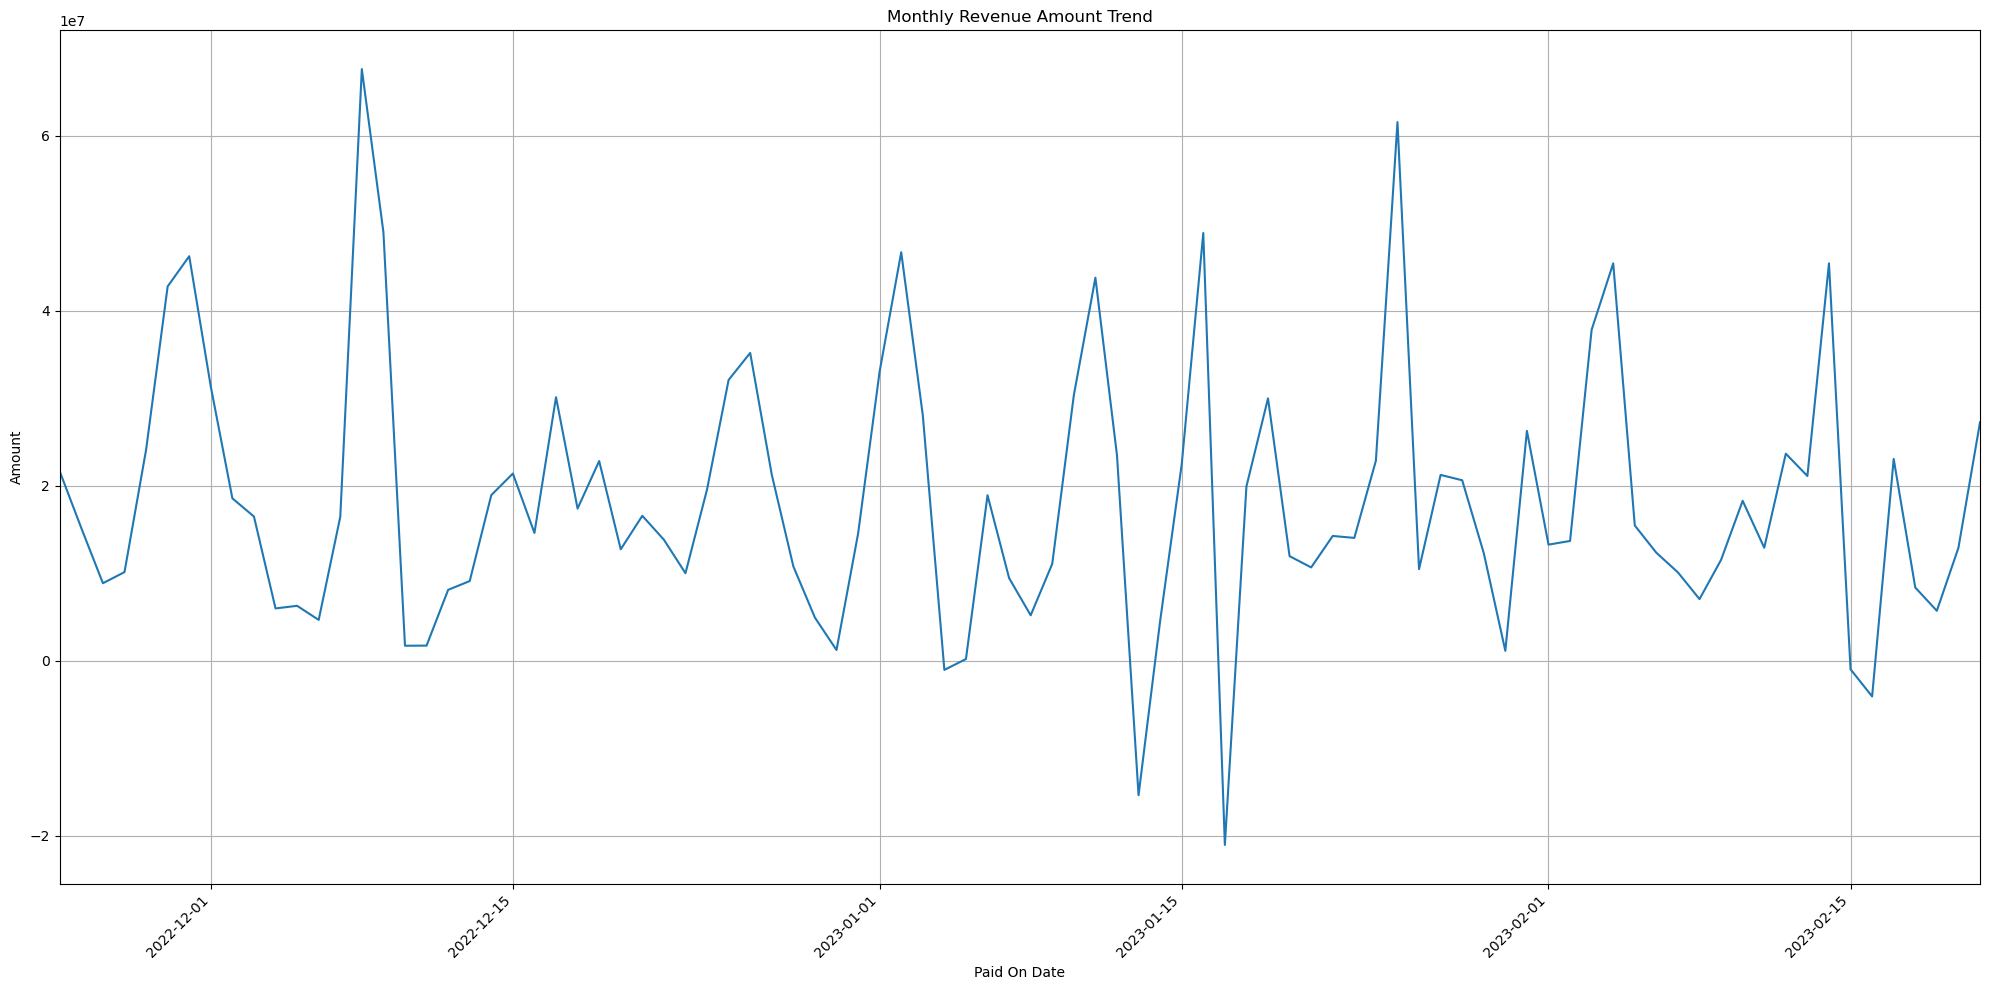

In [196]:
plot(pred_90)

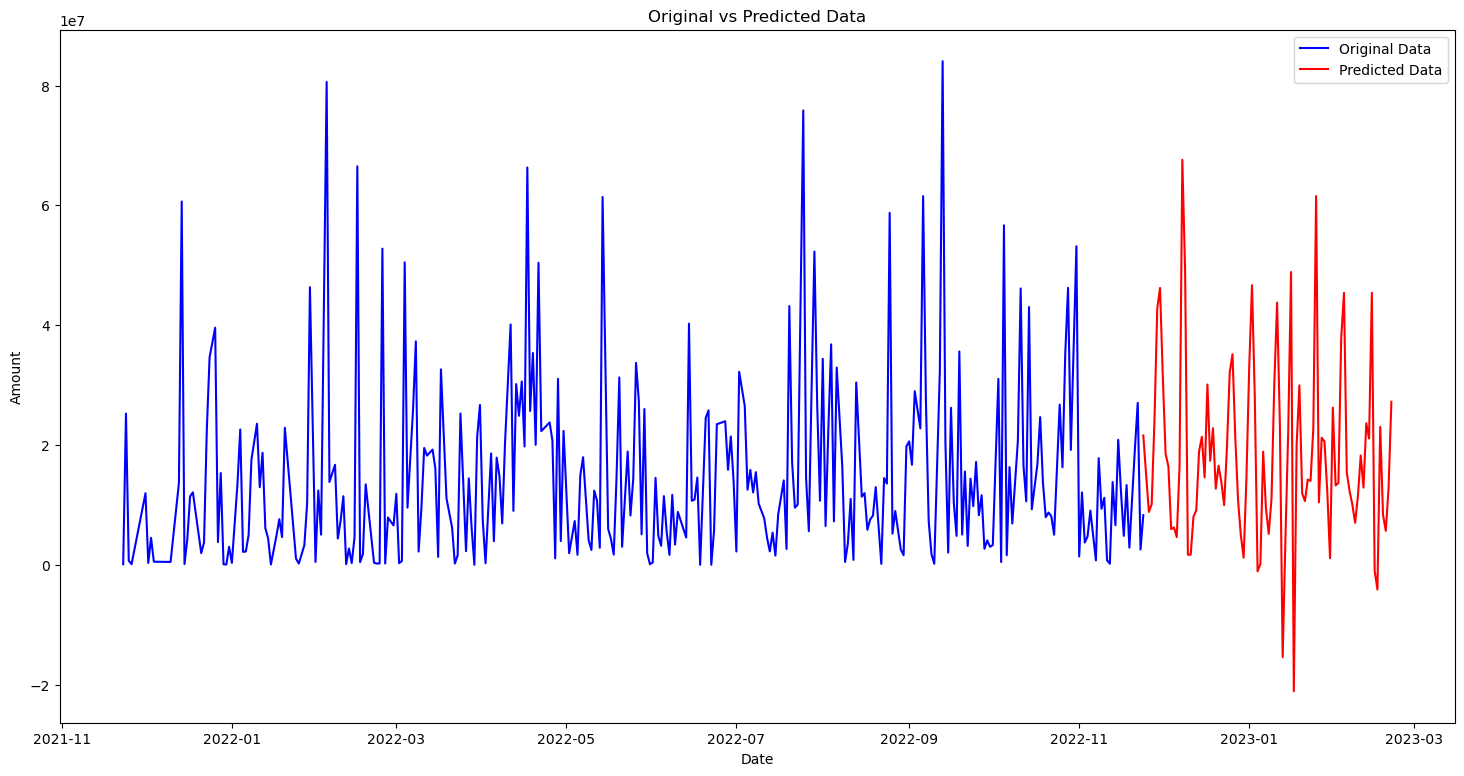

In [197]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df['amount'], label='Original Data', color='blue')
plt.plot(pred_90.index, pred_90['Predicted Amount'], label='Predicted Data', color='red')

plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Original vs Predicted Data')
plt.legend()

plt.show()

In [1]:
#Using LSTM, with prev 60 days record, and different multiple optimal parameters, we conclude,
# RMSE: 3004925.12

# Moving towards Statistical models implementation, ARIMA/SARIMAX

In [17]:
df.head()

amount
paid_on_date          
2021-11-23      111095
2021-11-24    25258997
2021-11-25      709552
2021-11-26      110585
2021-12-01    11962203

In [18]:
df.set_index('paid_on_date', inplace=True)

KeyError: "None of ['paid_on_date'] are in the columns"

In [19]:
df.index = pd.date_range(start='2021-11-23', periods=len(df.index), freq='D')

In [20]:
df.head()

amount
2021-11-23    111095
2021-11-24  25258997
2021-11-25    709552
2021-11-26    110585
2021-11-27  11962203

In [21]:
df.index

DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-27', '2021-11-28', '2021-11-29', '2021-11-30',
               '2021-12-01', '2021-12-02',
               ...
               '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
               '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21',
               '2022-09-22', '2022-09-23'],
              dtype='datetime64[ns]', length=305, freq='D')

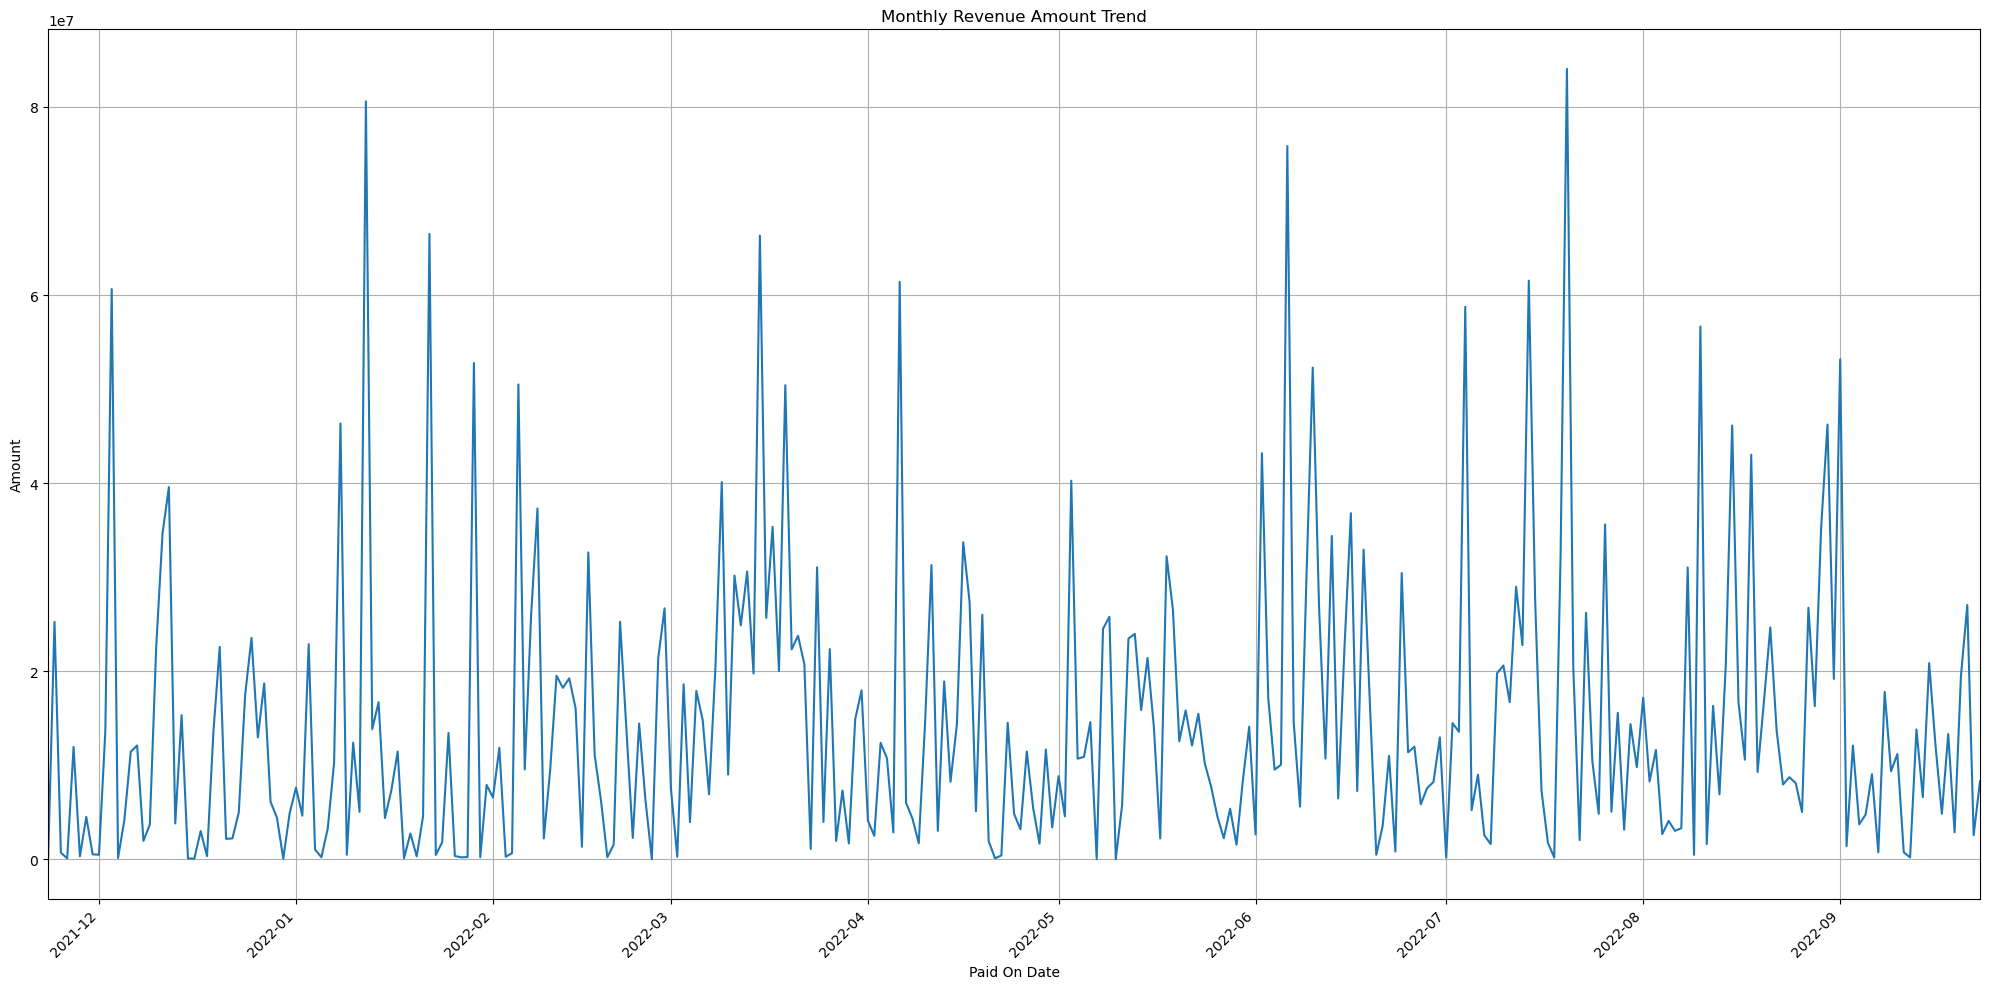

In [22]:
plot(df)

<AxesSubplot:xlabel='amount'>

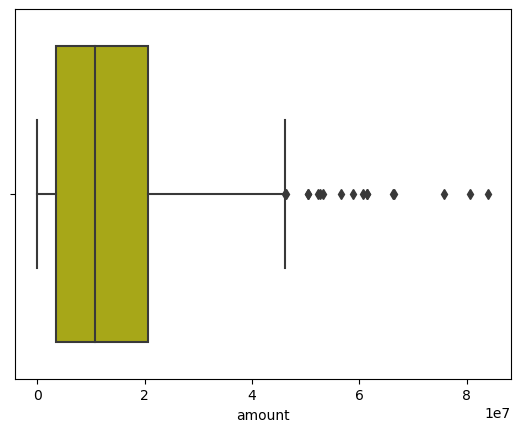

In [23]:
sns.boxplot(df['amount'],color='y')

In [24]:
q1=df['amount'].describe()['25%']
q3=df['amount'].describe()['75%']
iqr=q3-q1                #finding Interquartile Range
print(iqr)

17070556.0


In [25]:
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print("Lower Bound: ",lower,'\n',"Upper Bound: ",upper)

Lower Bound:  -22056459.0 
 Upper Bound:  46225765.0


In [26]:
total_outliers = df[(df['amount'] < lower) | (df['amount'] > upper)].shape[0]
print("Total outliers:", total_outliers)

Total outliers: 17


In [27]:
ol = (df['amount'] < lower) | (df['amount'] > upper)
df = df[~ol]

In [28]:
df['amount']=[upper if x>upper else x for x in df['amount']]

<AxesSubplot:xlabel='amount'>

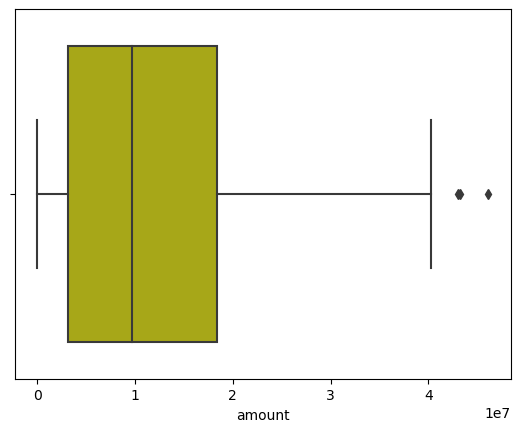

In [29]:
sns.boxplot(df['amount'],color='y')

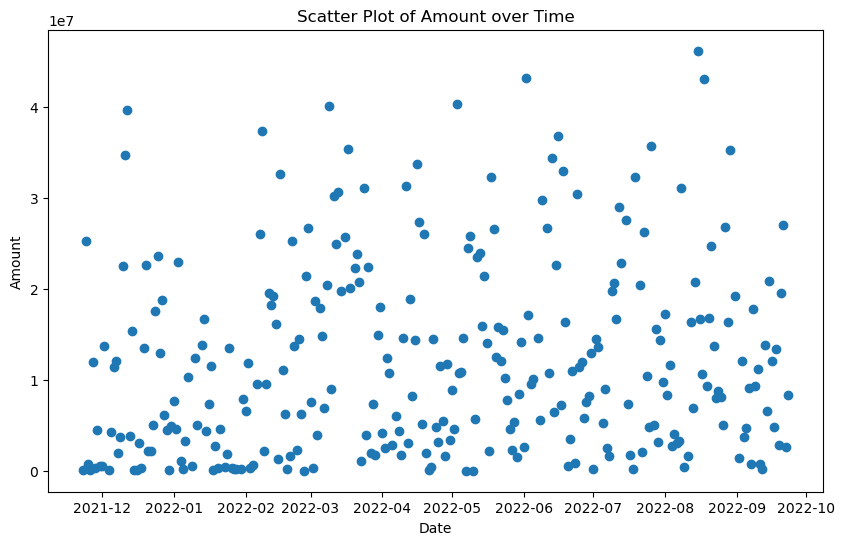

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['amount'])
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount over Time')
plt.show()


#with this scatter plot we can see the data is linearly distributed(but not that proper)

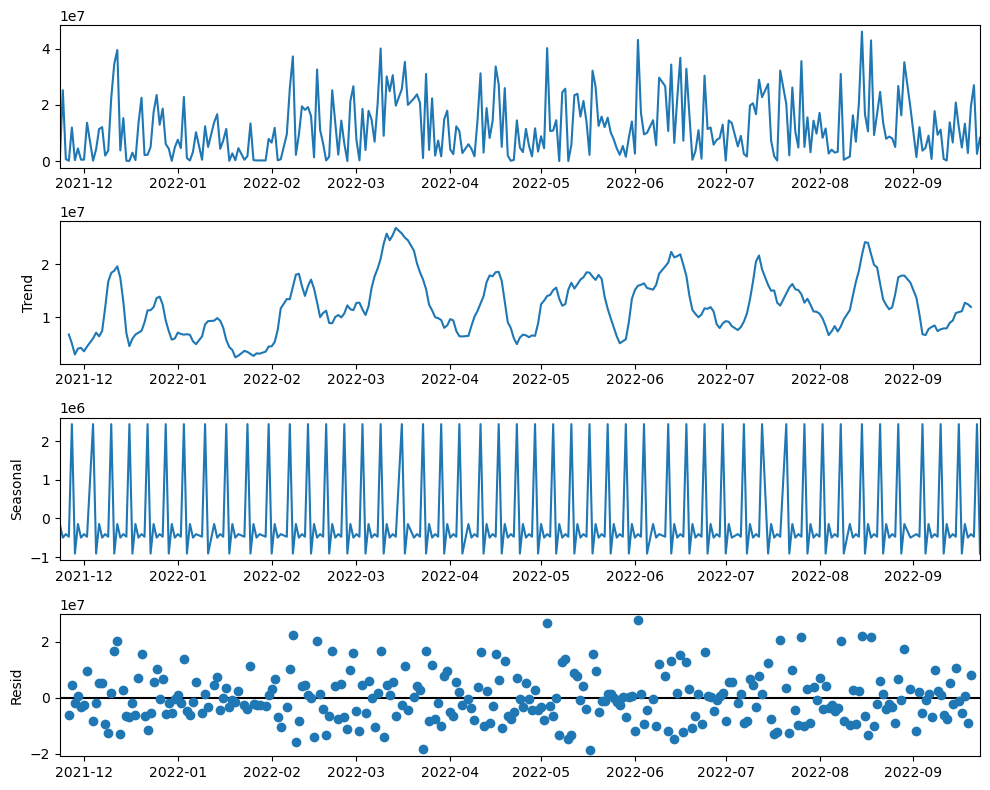

In [31]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
rcParams['figure.figsize']=10,8
decomposition = seasonal_decompose(df, model='additive', period=6)
fig=decomposition.plot()
plt.show()

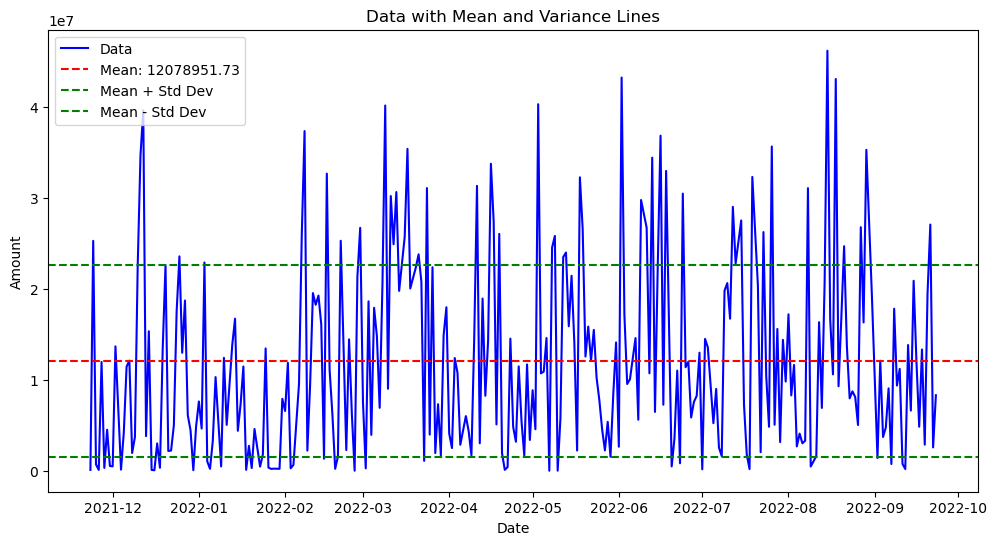

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['amount'], label='Data', color='blue')

# Mark mean and variance with different colored lines
mean_value = df['amount'].mean()
variance_value = df['amount'].var()

plt.axhline(y=mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axhline(y=mean_value + np.sqrt(variance_value), color='green', linestyle='--', label=f'Mean + Std Dev')
plt.axhline(y=mean_value - np.sqrt(variance_value), color='green', linestyle='--', label=f'Mean - Std Dev')

plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Data with Mean and Variance Lines')
plt.legend()
plt.show()

In [33]:
from statsmodels.tsa.stattools import adfuller

def stationary(data,var):
    data['rollmean']=data[var].rolling(window=45).mean()
    data['rollStd']=data[var].rolling(window=45).std()

    adfTest=adfuller(data[var],autolag='AIC')
    stats=pd.Series(adfTest[0:4],index=['Test Stats','p-value','#Lags used','number of observations'])
    print(stats)

    for key,value in adfTest[4].items():
        print('criticality: ',key,": ",value)

    plt.figure(figsize=(10,5))
    sns.lineplot(data=data,x=data.index,y=var)
    sns.lineplot(data=data,x=data.index,y=data.rollmean)
    sns.lineplot(data=data,x=data.index,y=data.rollStd)
    plt.show()

Test Stats                -4.804750
p-value                    0.000053
#Lags used                 5.000000
number of observations   282.000000
dtype: float64
criticality:  1% :  -3.4537536300652
criticality:  5% :  -2.8718443180148836
criticality:  10% :  -2.572260641818822


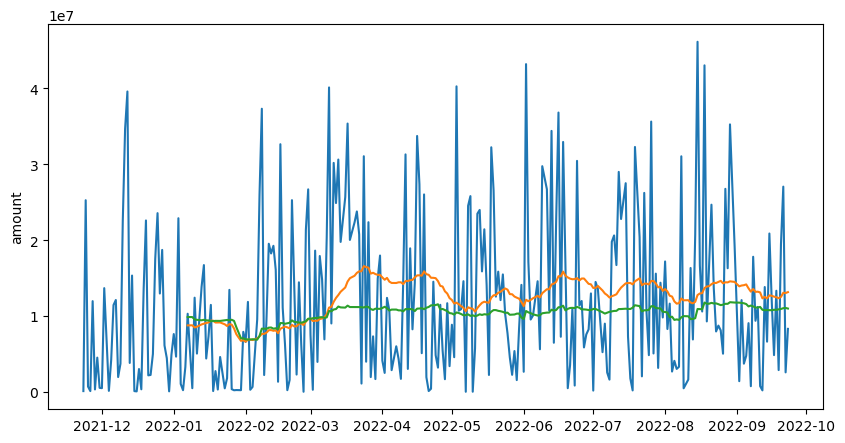

In [34]:
stationary(df,'amount')

In [35]:
df_final=df.copy()

In [36]:
df['shift']=df['amount'].shift(1)
df['shift_diff']=df.amount-df['shift']
df.head()

amount  rollmean  rollStd           shift       shift_diff
2021-11-23    111095       NaN      NaN             NaN              NaN
2021-11-24  25258997       NaN      NaN   111095.000000  25147902.000000
2021-11-25    709552       NaN      NaN 25258997.000000 -24549445.000000
2021-11-26    110585       NaN      NaN   709552.000000   -598967.000000
2021-11-27  11962203       NaN      NaN   110585.000000  11851618.000000

Test Stats               -13.815173
p-value                    0.000000
#Lags used                 4.000000
number of observations   283.000000
dtype: float64
criticality:  1% :  -3.453670163592738
criticality:  5% :  -2.8718077069772248
criticality:  10% :  -2.5722411158835796


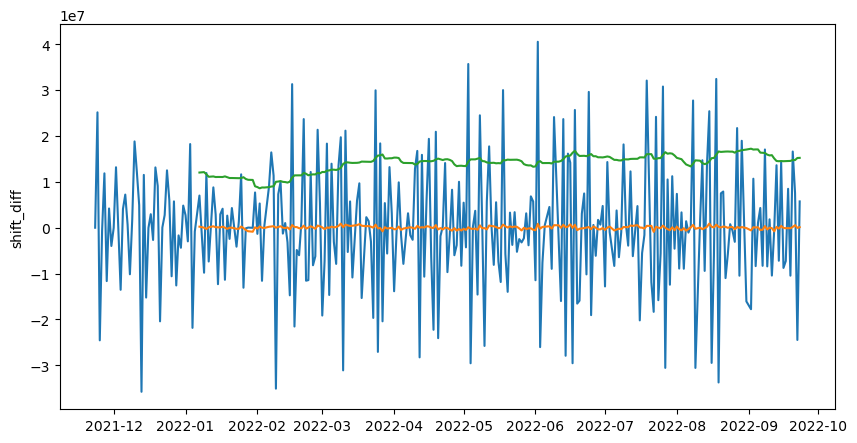

In [37]:
stationary(df.fillna(0),'shift_diff')

#here in this test, we can see that test stats are greater than criticalilty, but at the same time, graph is not
# giving best result, lets try different thing

In [38]:
#2) Applying Log function
df['log_amount']=np.log(df['amount'])
df.head()

amount  rollmean  rollStd           shift       shift_diff  \
2021-11-23    111095       NaN      NaN             NaN              NaN   
2021-11-24  25258997       NaN      NaN   111095.000000  25147902.000000   
2021-11-25    709552       NaN      NaN 25258997.000000 -24549445.000000   
2021-11-26    110585       NaN      NaN   709552.000000   -598967.000000   
2021-11-27  11962203       NaN      NaN   110585.000000  11851618.000000   

            log_amount  
2021-11-23   11.618141  
2021-11-24   17.044693  
2021-11-25   13.472389  
2021-11-26   11.613540  
2021-11-27   16.297262

Test Stats                -7.421786
p-value                    0.000000
#Lags used                 2.000000
number of observations   285.000000
dtype: float64
criticality:  1% :  -3.4535050041524245
criticality:  5% :  -2.8717352599720294
criticality:  10% :  -2.5722024776854417


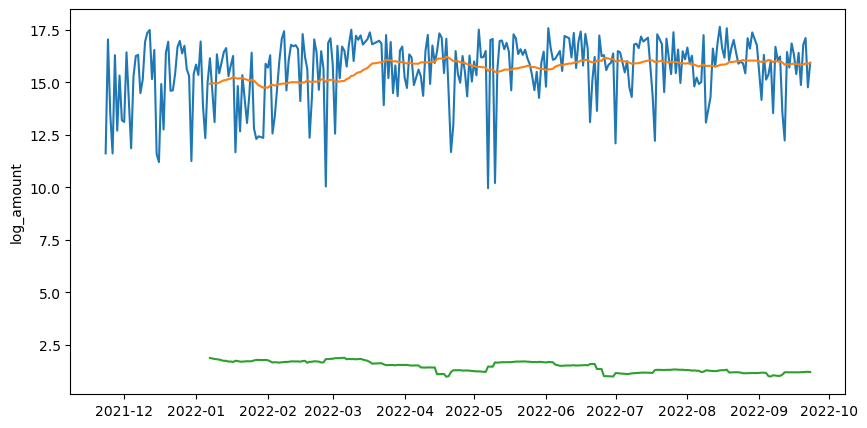

In [39]:
stationary(df,'log_amount')  #Ok Ok result, lets try more combos

In [40]:
#3) applying square root
df['sqrt_amount']=np.sqrt(df['amount'])
df.head()

amount  rollmean  rollStd           shift       shift_diff  \
2021-11-23    111095       NaN      NaN             NaN              NaN   
2021-11-24  25258997       NaN      NaN   111095.000000  25147902.000000   
2021-11-25    709552       NaN      NaN 25258997.000000 -24549445.000000   
2021-11-26    110585       NaN      NaN   709552.000000   -598967.000000   
2021-11-27  11962203       NaN      NaN   110585.000000  11851618.000000   

            log_amount  sqrt_amount  
2021-11-23   11.618141   333.309166  
2021-11-24   17.044693  5025.832966  
2021-11-25   13.472389   842.349096  
2021-11-26   11.613540   332.543230  
2021-11-27   16.297262  3458.641785

Test Stats                -4.964017
p-value                    0.000026
#Lags used                 5.000000
number of observations   282.000000
dtype: float64
criticality:  1% :  -3.4537536300652
criticality:  5% :  -2.8718443180148836
criticality:  10% :  -2.572260641818822


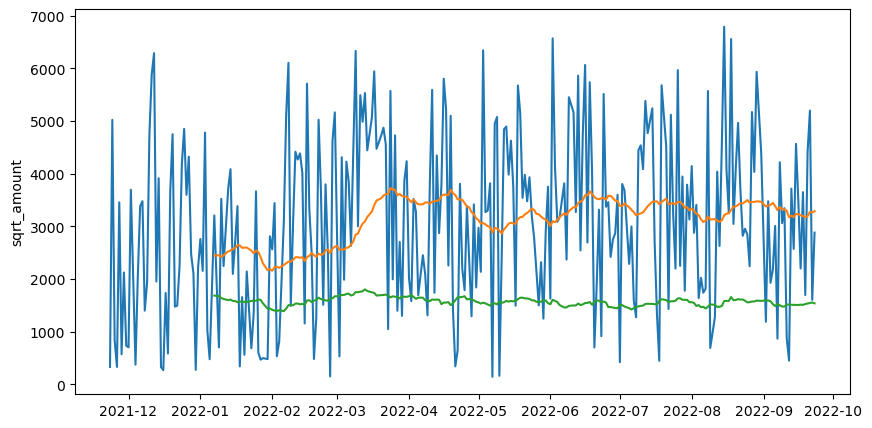

In [41]:
stationary(df,'sqrt_amount')  #yet Poor results

In [42]:
#4) check with cube root
df['cbrt_amount']=np.cbrt(df['amount'])

Test Stats                -5.109535
p-value                    0.000013
#Lags used                 5.000000
number of observations   282.000000
dtype: float64
criticality:  1% :  -3.4537536300652
criticality:  5% :  -2.8718443180148836
criticality:  10% :  -2.572260641818822


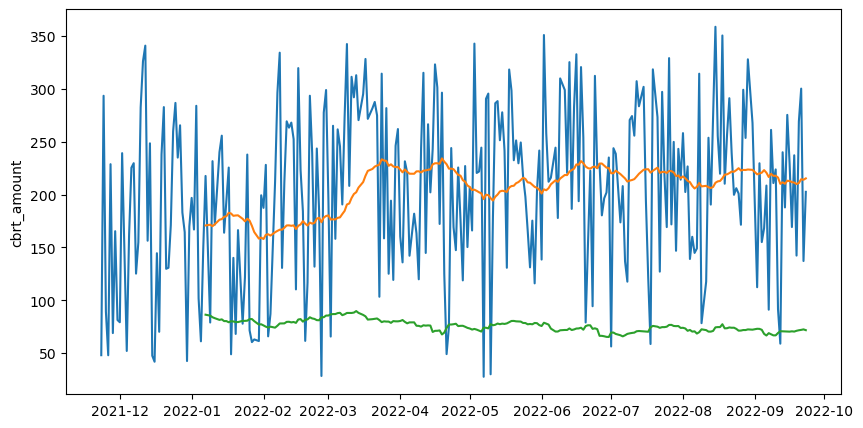

In [43]:
stationary(df,'cbrt_amount')

In [44]:
#4 Combining log -> sqrt
df['lgsqrt_amount']=np.sqrt(df['log_amount'])
df.head()

amount  rollmean  rollStd           shift       shift_diff  \
2021-11-23    111095       NaN      NaN             NaN              NaN   
2021-11-24  25258997       NaN      NaN   111095.000000  25147902.000000   
2021-11-25    709552       NaN      NaN 25258997.000000 -24549445.000000   
2021-11-26    110585       NaN      NaN   709552.000000   -598967.000000   
2021-11-27  11962203       NaN      NaN   110585.000000  11851618.000000   

            log_amount  sqrt_amount  cbrt_amount  lgsqrt_amount  
2021-11-23   11.618141   333.309166    48.072662       3.408539  
2021-11-24   17.044693  5025.832966   293.408056       4.128522  
2021-11-25   13.472389   842.349096    89.192446       3.670475  
2021-11-26   11.613540   332.543230    47.998987       3.407864  
2021-11-27   16.297262  3458.641785   228.702225       4.036987

Test Stats                -7.452087
p-value                    0.000000
#Lags used                 2.000000
number of observations   285.000000
dtype: float64
criticality:  1% :  -3.4535050041524245
criticality:  5% :  -2.8717352599720294
criticality:  10% :  -2.5722024776854417


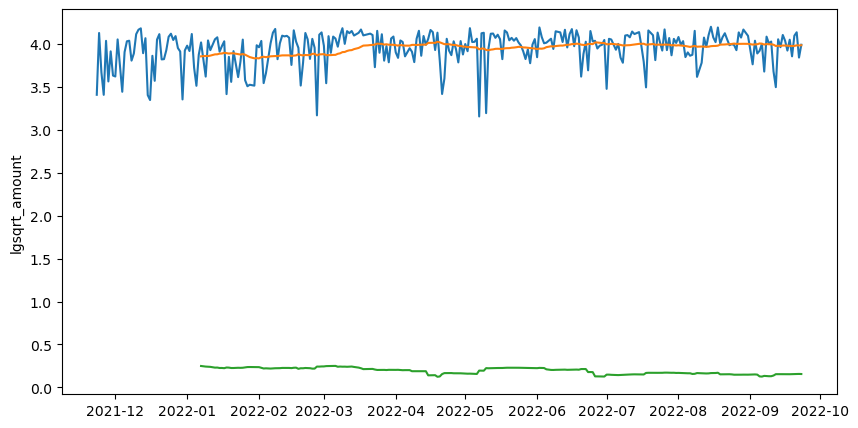

In [45]:
stationary(df,'lgsqrt_amount')

In [46]:
#5 Combining log -> cbrt
df['lgcbrt_amount']=np.cbrt(df['log_amount'])
df.head()

amount  rollmean  rollStd           shift       shift_diff  \
2021-11-23    111095       NaN      NaN             NaN              NaN   
2021-11-24  25258997       NaN      NaN   111095.000000  25147902.000000   
2021-11-25    709552       NaN      NaN 25258997.000000 -24549445.000000   
2021-11-26    110585       NaN      NaN   709552.000000   -598967.000000   
2021-11-27  11962203       NaN      NaN   110585.000000  11851618.000000   

            log_amount  sqrt_amount  cbrt_amount  lgsqrt_amount  lgcbrt_amount  
2021-11-23   11.618141   333.309166    48.072662       3.408539       2.264882  
2021-11-24   17.044693  5025.832966   293.408056       4.128522       2.573533  
2021-11-25   13.472389   842.349096    89.192446       3.670475       2.379477  
2021-11-26   11.613540   332.543230    47.998987       3.407864       2.264583  
2021-11-27   16.297262  3458.641785   228.702225       4.036987       2.535352

Test Stats                -7.462525
p-value                    0.000000
#Lags used                 2.000000
number of observations   285.000000
dtype: float64
criticality:  1% :  -3.4535050041524245
criticality:  5% :  -2.8717352599720294
criticality:  10% :  -2.5722024776854417


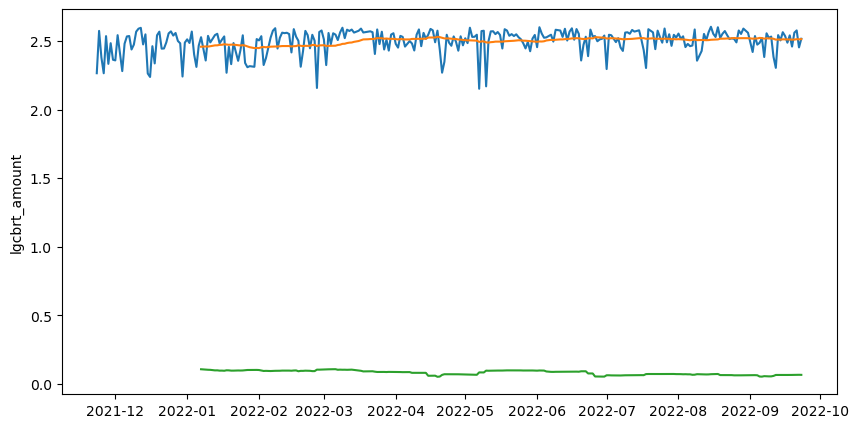

In [47]:
stationary(df,'lgcbrt_amount')

In [48]:
# 5) log->sqrt->shift(1)
df['lgsqrt_amount_shf']=df['lgsqrt_amount']-df['lgsqrt_amount'].shift(15)
df.head()

amount  rollmean  rollStd           shift       shift_diff  \
2021-11-23    111095       NaN      NaN             NaN              NaN   
2021-11-24  25258997       NaN      NaN   111095.000000  25147902.000000   
2021-11-25    709552       NaN      NaN 25258997.000000 -24549445.000000   
2021-11-26    110585       NaN      NaN   709552.000000   -598967.000000   
2021-11-27  11962203       NaN      NaN   110585.000000  11851618.000000   

            log_amount  sqrt_amount  cbrt_amount  lgsqrt_amount  \
2021-11-23   11.618141   333.309166    48.072662       3.408539   
2021-11-24   17.044693  5025.832966   293.408056       4.128522   
2021-11-25   13.472389   842.349096    89.192446       3.670475   
2021-11-26   11.613540   332.543230    47.998987       3.407864   
2021-11-27   16.297262  3458.641785   228.702225       4.036987   

            lgcbrt_amount  lgsqrt_amount_shf  
2021-11-23       2.264882                NaN  
2021-11-24       2.573533                NaN  
2021-11-25       2.379477                NaN  
2021-11-26       2.264583                NaN  
2021-11-27       2.535352                NaN

Test Stats                -7.221068
p-value                    0.000000
#Lags used                14.000000
number of observations   273.000000
dtype: float64
criticality:  1% :  -3.45453261164607
criticality:  5% :  -2.8721859575020017
criticality:  10% :  -2.572442854861866


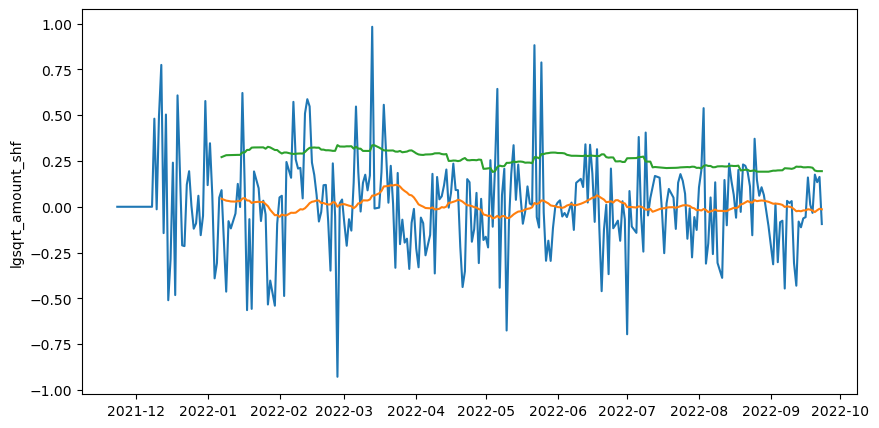

In [49]:
stationary(df.fillna(0),'lgsqrt_amount_shf')

In [50]:
# 5) log->cbrt->shift(1)
df['lgcbrt_amount_shf']=df['lgcbrt_amount']-df['lgcbrt_amount'].shift(10)
df.head()

amount  rollmean  rollStd           shift       shift_diff  \
2021-11-23    111095       NaN      NaN             NaN              NaN   
2021-11-24  25258997       NaN      NaN   111095.000000  25147902.000000   
2021-11-25    709552       NaN      NaN 25258997.000000 -24549445.000000   
2021-11-26    110585       NaN      NaN   709552.000000   -598967.000000   
2021-11-27  11962203       NaN      NaN   110585.000000  11851618.000000   

            log_amount  sqrt_amount  cbrt_amount  lgsqrt_amount  \
2021-11-23   11.618141   333.309166    48.072662       3.408539   
2021-11-24   17.044693  5025.832966   293.408056       4.128522   
2021-11-25   13.472389   842.349096    89.192446       3.670475   
2021-11-26   11.613540   332.543230    47.998987       3.407864   
2021-11-27   16.297262  3458.641785   228.702225       4.036987   

            lgcbrt_amount  lgsqrt_amount_shf  lgcbrt_amount_shf  
2021-11-23       2.264882                NaN                NaN  
2021-11-24       2.573533                NaN                NaN  
2021-11-25       2.379477                NaN                NaN  
2021-11-26       2.264583                NaN                NaN  
2021-11-27       2.535352                NaN                NaN

Test Stats                -9.600987
p-value                    0.000000
#Lags used                 9.000000
number of observations   278.000000
dtype: float64
criticality:  1% :  -3.4540935579190495
criticality:  5% :  -2.8719934111688965
criticality:  10% :  -2.5723401594120388


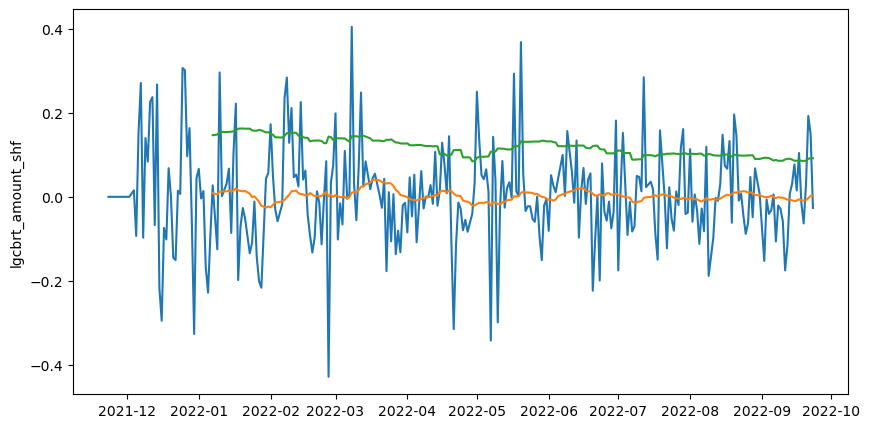

In [51]:
stationary(df.fillna(0),'lgcbrt_amount_shf')

In [52]:
#From above observation, we can conclude 3 transformations,

# 1) General Shifting and Differencing,
# 2) Shifting on Logarthmic Square Root
# 3) Shifting on Logarthmic Cube Root

In [53]:
df=df[['amount','shift_diff','lgcbrt_amount']]

In [54]:
df.head()

amount       shift_diff  lgcbrt_amount
2021-11-23    111095              NaN       2.264882
2021-11-24  25258997  25147902.000000       2.573533
2021-11-25    709552 -24549445.000000       2.379477
2021-11-26    110585   -598967.000000       2.264583
2021-11-27  11962203  11851618.000000       2.535352

In [55]:
df.index = pd.date_range(start='2021-11-23', periods=len(df.index), freq='B')

In [56]:
df['first_diff']=df['amount'].diff(1)  #inly single difference we are taking, so d=1
df['30_diff']=df['amount'].diff(30) #d=30

In [57]:
df.head()

amount       shift_diff  lgcbrt_amount       first_diff  30_diff
2021-11-23    111095              NaN       2.264882              NaN      NaN
2021-11-24  25258997  25147902.000000       2.573533  25147902.000000      NaN
2021-11-25    709552 -24549445.000000       2.379477 -24549445.000000      NaN
2021-11-26    110585   -598967.000000       2.264583   -598967.000000      NaN
2021-11-29  11962203  11851618.000000       2.535352  11851618.000000      NaN

In [58]:
# Modelling ARIMA

In [59]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

[]

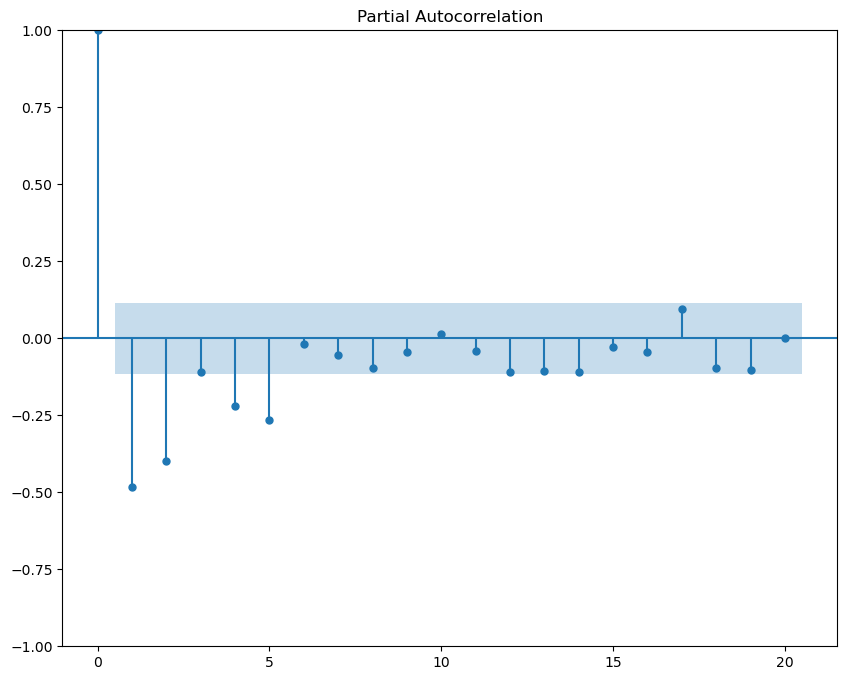

In [60]:
plot_pacf(df['first_diff'].fillna(0),lags=20)
plt.plot()

# can try p=1,2

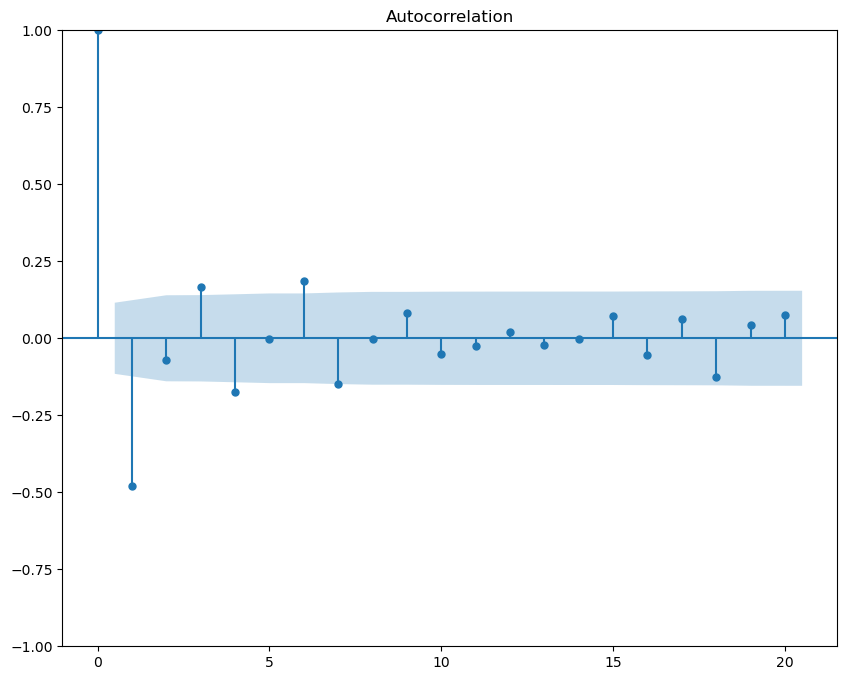

In [61]:
plot_acf(df['first_diff'].fillna(0),lags=20)
plt.show()

# q=1

In [62]:
len(df)

288

In [63]:
train=df[:round(len(df)*75/100)]
train.tail()

amount      shift_diff  lgcbrt_amount      first_diff  \
2022-09-14  13568986  -925531.000000       2.541871  -925531.000000   
2022-09-15   5237911 -8331075.000000       2.491783 -8331075.000000   
2022-09-16   8996688  3758777.000000       2.520491  3758777.000000   
2022-09-19   2563850 -6432838.000000       2.452823 -6432838.000000   
2022-09-20   1626919  -936931.000000       2.427360  -936931.000000   

                    30_diff  
2022-09-14  10912109.000000  
2022-09-15 -37950171.000000  
2022-09-16  -8163200.000000  
2022-09-19  -6977559.000000  
2022-09-20  -8440053.000000

In [64]:
test=df[round(len(df)*75/100):]
test.head()

amount      shift_diff  lgcbrt_amount      first_diff  \
2022-09-21  19783546 18156627.000000       2.561177 18156627.000000   
2022-09-22  20619931   836385.000000       2.563279   836385.000000   
2022-09-23  16714130 -3905801.000000       2.552580 -3905801.000000   
2022-09-26  28990137 12276007.000000       2.580448 12276007.000000   
2022-09-27  22784013 -6206124.000000       2.568332 -6206124.000000   

                    30_diff  
2022-09-21   5198224.000000  
2022-09-22  14997722.000000  
2022-09-23 -13027340.000000  
2022-09-26   2288548.000000  
2022-09-27  12068113.000000

In [65]:
model=ARIMA(train['amount'],order=(1,1,3))
model_fit=model.fit()

In [66]:
prediction=model_fit.predict(start=test.index[0],end=test.index[-1])

In [67]:
prediction  #here, we cant find the proper value, because of seasonality thing, going for SARIMAX

2022-09-21   8608328.585993
2022-09-22   8822035.873382
2022-09-23   8686511.710672
2022-09-26   8761532.932903
2022-09-27   8720003.926765
                  ...      
2022-12-23   8734801.481218
2022-12-26   8734801.481218
2022-12-27   8734801.481218
2022-12-28   8734801.481218
2022-12-29   8734801.481218
Freq: B, Name: predicted_mean, Length: 72, dtype: float64

In [68]:
df['ARIMA Pred']=prediction
df.tail(10)

amount       shift_diff  lgcbrt_amount       first_diff  \
2022-12-16   6623816  -7198117.000000       2.504322  -7198117.000000   
2022-12-19  20873397  14249581.000000       2.563899  14249581.000000   
2022-12-20  12105015  -8768382.000000       2.535967  -8768382.000000   
2022-12-21   4849517  -7255498.000000       2.487640  -7255498.000000   
2022-12-22  13331051   8481534.000000       2.540958   8481534.000000   
2022-12-23   2879833 -10451218.000000       2.459246 -10451218.000000   
2022-12-26  19488085  16608252.000000       2.560412  16608252.000000   
2022-12-27  27046719   7558634.000000       2.576970   7558634.000000   
2022-12-28   2579056 -24467663.000000       2.453151 -24467663.000000   
2022-12-29   8309358   5730302.000000       2.516314   5730302.000000   

                    30_diff     ARIMA Pred  
2022-12-16   -289575.000000 8734801.481218  
2022-12-19    135363.000000 8734801.481218  
2022-12-20 -34027332.000000 8734801.481218  
2022-12-21 -11813446.000000 8734801.481218  
2022-12-22   2732740.000000 8734801.481218  
2022-12-23 -40147387.000000 8734801.481218  
2022-12-26  10196366.000000 8734801.481218  
2022-12-27  10265017.000000 8734801.481218  
2022-12-28 -22089681.000000 8734801.481218  
2022-12-29  -5377793.000000 8734801.481218

In [69]:
df.isnull().sum()

amount             0
shift_diff         1
lgcbrt_amount      0
first_diff         1
30_diff           30
ARIMA Pred       216
dtype: int64

<AxesSubplot:ylabel='amount'>

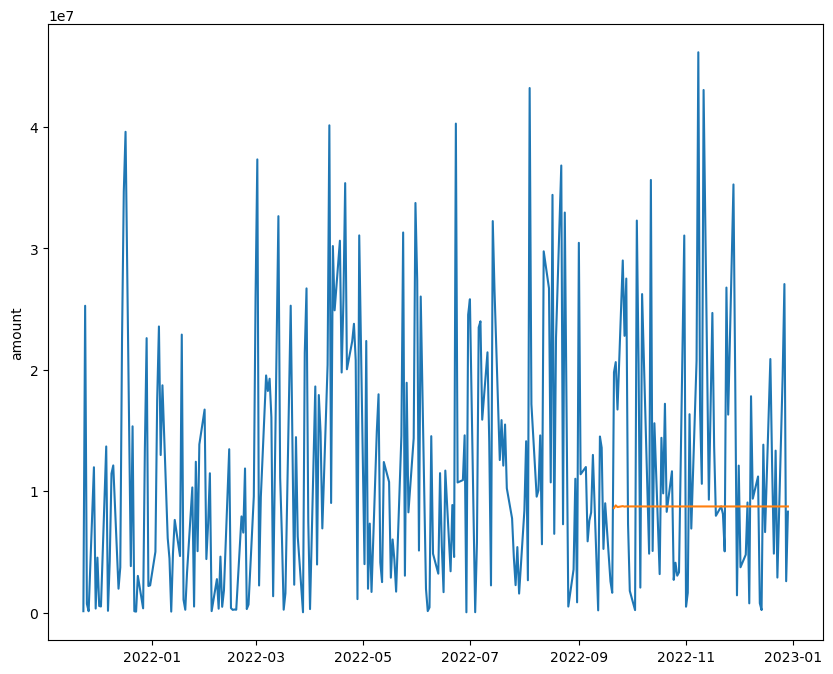

In [70]:
sns.lineplot(data=df,x=df.index,y='amount')
sns.lineplot(data=df,x=df.index,y='ARIMA Pred')

In [71]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['amount'],prediction))

11591477.595349506

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

[]

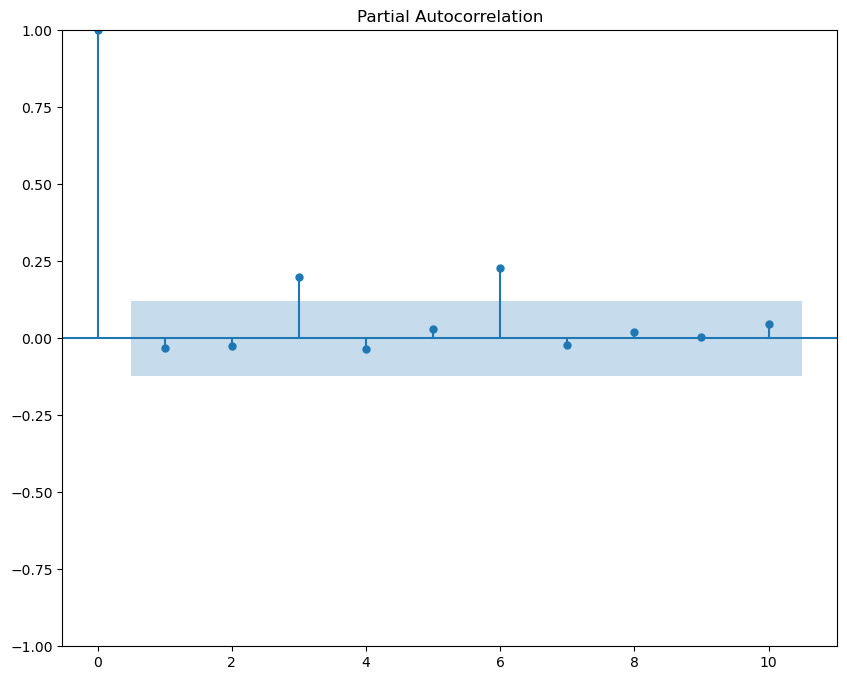

In [73]:
plot_pacf(df['30_diff'].dropna(),lags=10)
plt.plot()

#p=3

[]

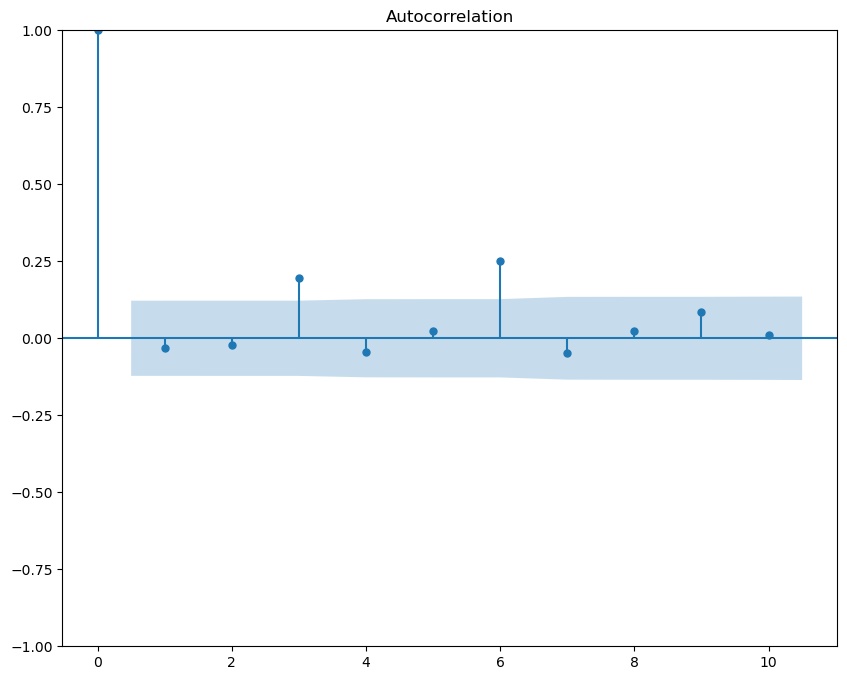

In [74]:
plot_acf(df['30_diff'].dropna(),lags=10)
plt.plot()
# q=3

In [1]:
model=SARIMAX(train['amount'],order=(3,1,3),seasonal_order=(3,1,3,30))

#lets try with p=3,6

NameError: name 'SARIMAX' is not defined

In [76]:
model_fit=model.fit()
pred=model_fit.predict(start=test.index[0],end=test.index[-1])
df['SARIMAX Pred']=pred

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [77]:
df.tail()

amount       shift_diff  lgcbrt_amount       first_diff  \
2022-12-23   2879833 -10451218.000000       2.459246 -10451218.000000   
2022-12-26  19488085  16608252.000000       2.560412  16608252.000000   
2022-12-27  27046719   7558634.000000       2.576970   7558634.000000   
2022-12-28   2579056 -24467663.000000       2.453151 -24467663.000000   
2022-12-29   8309358   5730302.000000       2.516314   5730302.000000   

                    30_diff     ARIMA Pred    SARIMAX Pred  
2022-12-23 -40147387.000000 8734801.481218 15918522.346312  
2022-12-26  10196366.000000 8734801.481218 21462292.401984  
2022-12-27  10265017.000000 8734801.481218 12144709.344349  
2022-12-28 -22089681.000000 8734801.481218 21398797.856060  
2022-12-29  -5377793.000000 8734801.481218 16132361.907447

<AxesSubplot:ylabel='amount'>

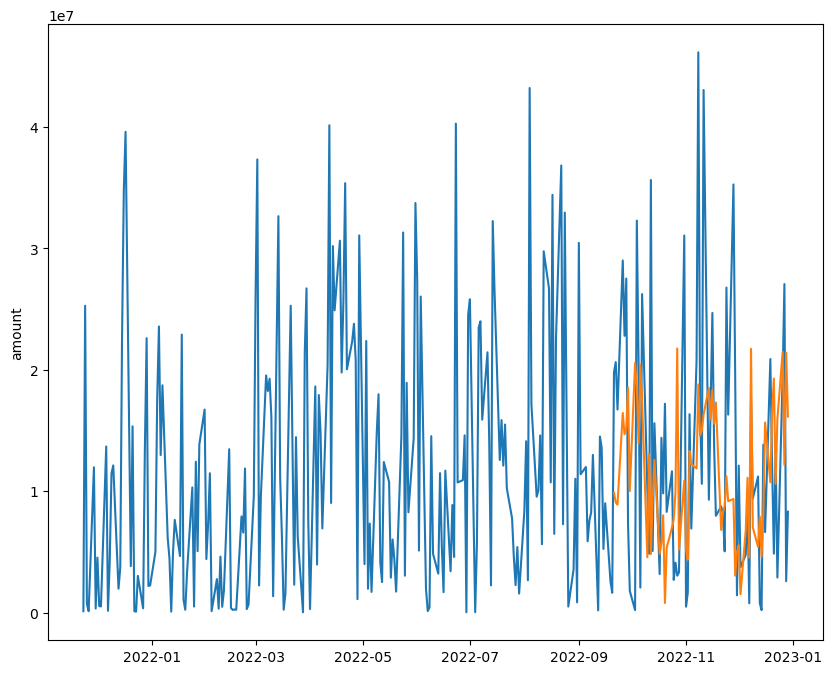

In [78]:
sns.lineplot(data=df,x=df.index,y='amount')
sns.lineplot(data=df,x=df.index,y='SARIMAX Pred')

In [79]:
np.sqrt(mean_squared_error(test['amount'],prediction))

11591477.595349506

In [80]:
df.tail()

amount       shift_diff  lgcbrt_amount       first_diff  \
2022-12-23   2879833 -10451218.000000       2.459246 -10451218.000000   
2022-12-26  19488085  16608252.000000       2.560412  16608252.000000   
2022-12-27  27046719   7558634.000000       2.576970   7558634.000000   
2022-12-28   2579056 -24467663.000000       2.453151 -24467663.000000   
2022-12-29   8309358   5730302.000000       2.516314   5730302.000000   

                    30_diff     ARIMA Pred    SARIMAX Pred  
2022-12-23 -40147387.000000 8734801.481218 15918522.346312  
2022-12-26  10196366.000000 8734801.481218 21462292.401984  
2022-12-27  10265017.000000 8734801.481218 12144709.344349  
2022-12-28 -22089681.000000 8734801.481218 21398797.856060  
2022-12-29  -5377793.000000 8734801.481218 16132361.907447

In [81]:
#Future Data using SARIMAX
from datetime import timedelta

fut=pd.DataFrame(pd.date_range(start='2022-12-30',end= '2023-03-30' ,freq='B'),columns=['Dates'])
fut.set_index('Dates',inplace=True)
fut.head()

Empty DataFrame
Columns: []
Index: [2022-12-30 00:00:00, 2023-01-02 00:00:00, 2023-01-03 00:00:00, 2023-01-04 00:00:00, 2023-01-05 00:00:00]

In [82]:
model_fit.predict(start=fut.index[0],end=fut.index[-1])

2022-12-30   12738096.565112
2023-01-02    9174058.904248
2023-01-03    7132387.729618
2023-01-04    4403187.233072
2023-01-05   15184419.393526
                   ...      
2023-03-24   13672560.786052
2023-03-27    4415852.922946
2023-03-28    9644916.137934
2023-03-29    3598758.732401
2023-03-30   11493271.615913
Freq: B, Name: predicted_mean, Length: 65, dtype: float64

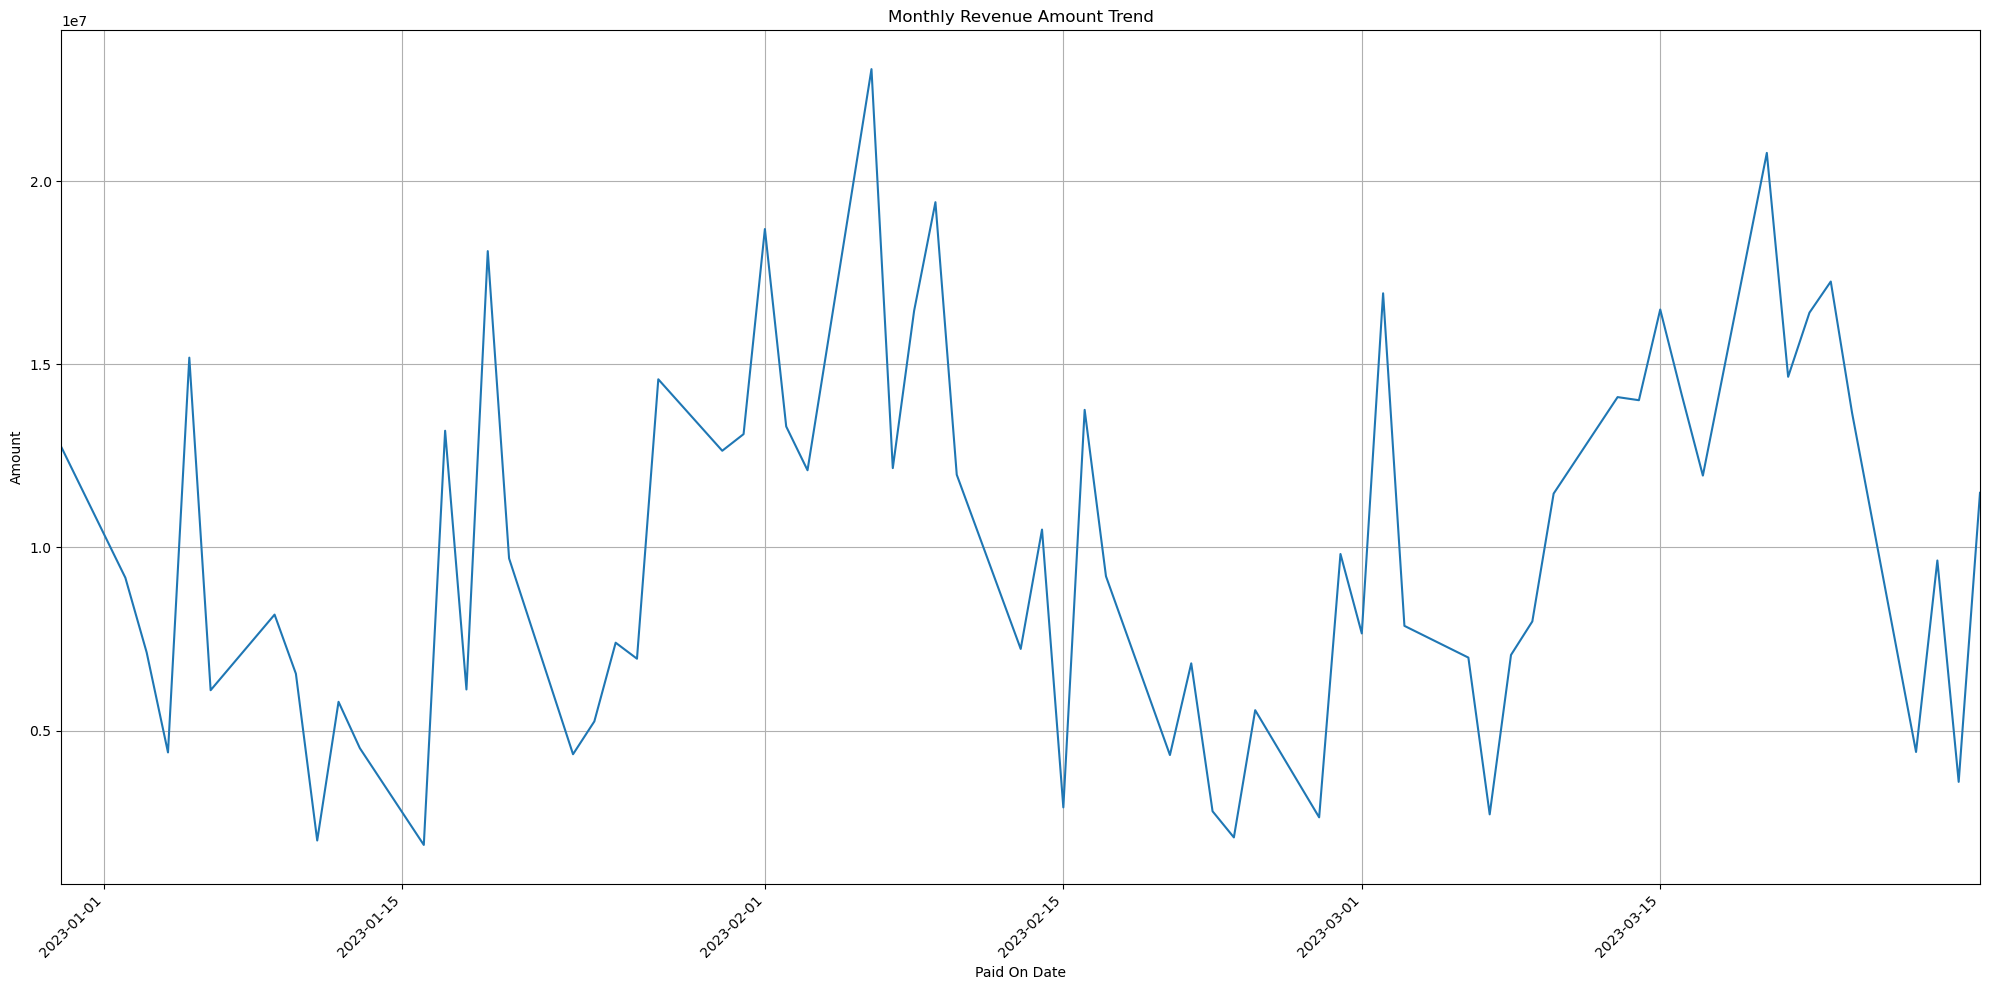

In [83]:
plot(model_fit.predict(start=fut.index[0],end=fut.index[-1]))

<AxesSubplot:ylabel='amount'>

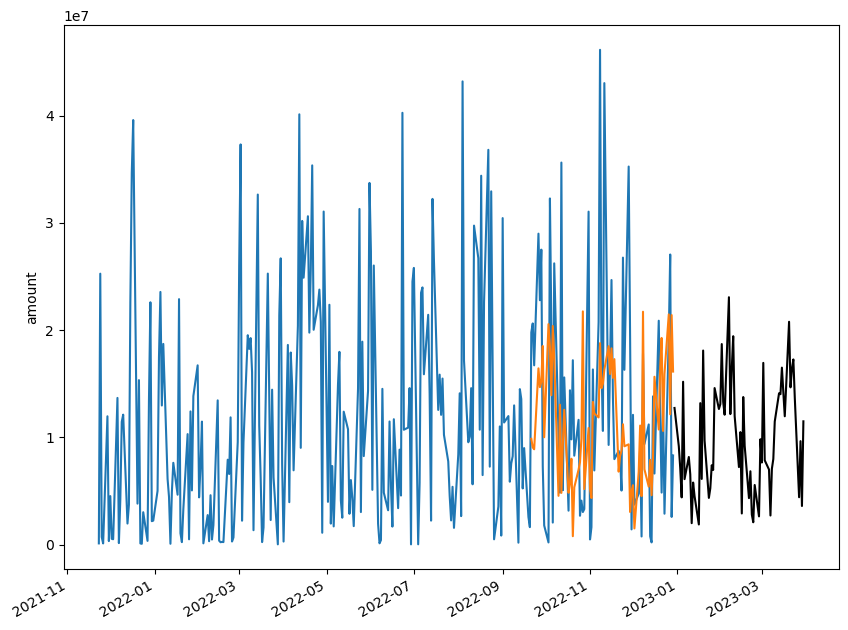

In [84]:
sns.lineplot(data=df,x=df.index,y='amount')
sns.lineplot(data=df,x=df.index,y='SARIMAX Pred')
model_fit.predict(start=fut.index[0],end=fut.index[-1]).plot(color='black')

In [95]:
df.tail(10)

amount           shift  lgsqrt_amount_shf  lgcbrt_amount_shf  \
2022-12-16   6623816 13821933.000000          -0.112004           0.030950   
2022-12-19  20873397  6623816.000000          -0.063324           0.077219   
2022-12-20  12105015 20873397.000000          -0.056641           0.015094   
2022-12-21   4849517 12105015.000000           0.159970           0.104425   
2022-12-22  13331051  4849517.000000           0.011993          -0.014864   
2022-12-23   2879833 13331051.000000          -0.033278          -0.063407   
2022-12-26  19488085  2879833.000000           0.175691           0.028474   
2022-12-27  27046719 19488085.000000           0.134339           0.192759   
2022-12-28   2579056 27046719.000000           0.163130           0.149082   
2022-12-29   8309358  2579056.000000          -0.094374          -0.026509   

                 first_diff          30_diff     ARIMA Pred    SARIMAX Pred  
2022-12-16  -7198117.000000   5854736.000000 8734801.484298 15216175.085629  
2022-12-19  14249581.000000  20668207.000000 8734801.484298 10257690.516849  
2022-12-20  -8768382.000000  -1716918.000000 8734801.484298 16932093.738737  
2022-12-21  -7255498.000000  -1774299.000000 8734801.484298 18831360.471975  
2022-12-22   8481534.000000  -7542346.000000 8734801.484298 10496569.342374  
2022-12-23 -10451218.000000  -9225182.000000 8734801.484298 15759659.879436  
2022-12-26  16608252.000000  14638568.000000 8734801.484298 21243915.115355  
2022-12-27   7558634.000000  13715668.000000 8734801.484298 12013990.844805  
2022-12-28 -24467663.000000   -300777.000000 8734801.484298 21180916.037504  
2022-12-29   5730302.000000 -11178727.000000 8734801.484298 15994604.669140

**Lets Try SARIMAX with shift_diff column**

[]

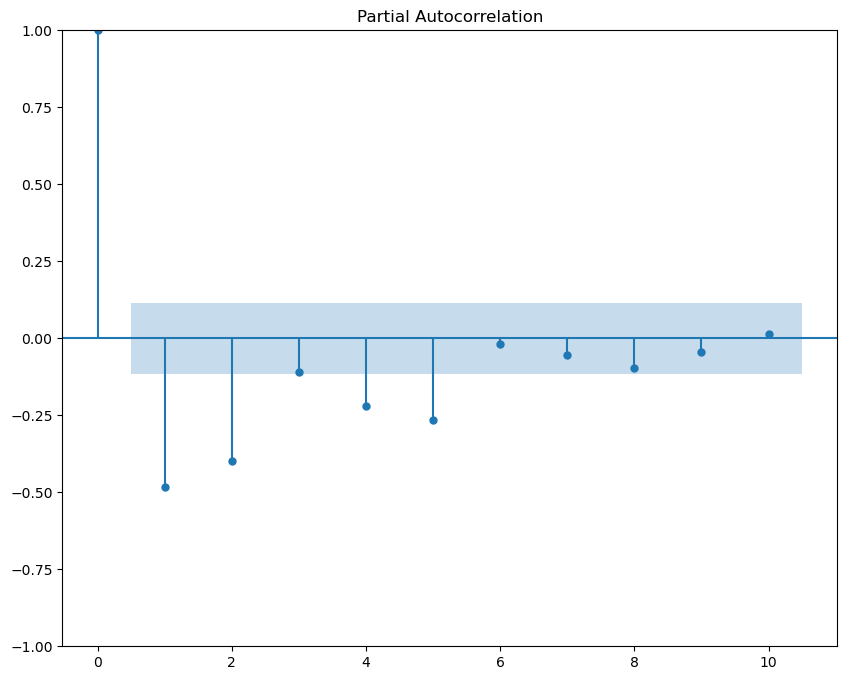

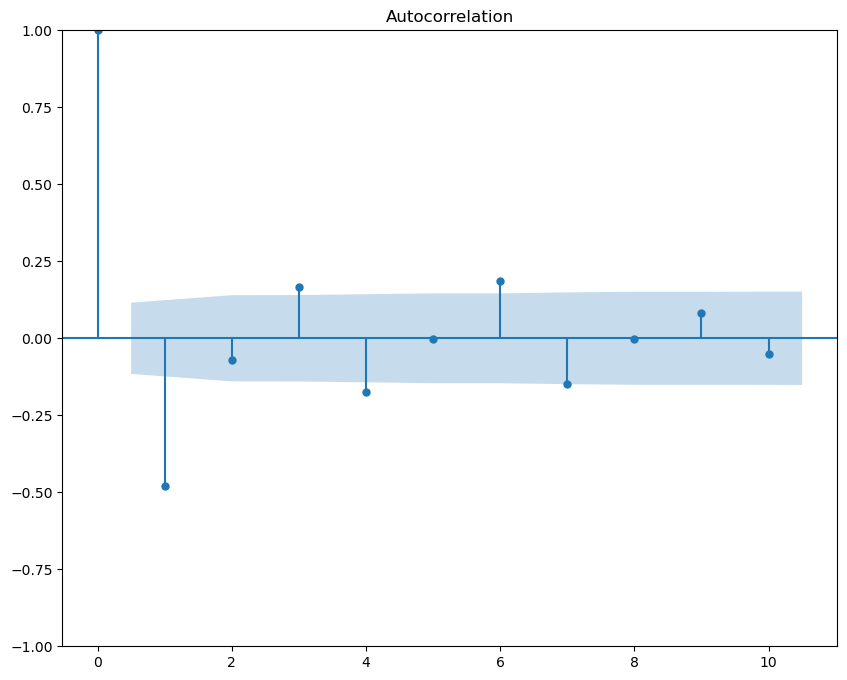

In [85]:
plot_pacf(df['shift_diff'].dropna(),lags=10)
plot_acf(df['shift_diff'].dropna(),lags=10)
plt.plot()
# p=1,2
# d=1
# q=1

In [90]:
model=SARIMAX(train['shift_diff'],order=(2,1,1),seasonal_order=(2,1,1,30))

In [91]:
model_fit=model.fit()
pred=model_fit.predict(start=test.index[0],end=test.index[-1])
df['SARIMAX Shift_diff']=pred

In [92]:
df.tail()

amount       shift_diff  lgcbrt_amount       first_diff  \
2022-12-23   2879833 -10451218.000000       2.459246 -10451218.000000   
2022-12-26  19488085  16608252.000000       2.560412  16608252.000000   
2022-12-27  27046719   7558634.000000       2.576970   7558634.000000   
2022-12-28   2579056 -24467663.000000       2.453151 -24467663.000000   
2022-12-29   8309358   5730302.000000       2.516314   5730302.000000   

                    30_diff     ARIMA Pred    SARIMAX Pred  SARIMAX Shift_diff  
2022-12-23 -40147387.000000 8734801.481218 15918522.346312      2060286.587614  
2022-12-26  10196366.000000 8734801.481218 21462292.401984      8578554.823474  
2022-12-27  10265017.000000 8734801.481218 12144709.344349    -11644368.256612  
2022-12-28 -22089681.000000 8734801.481218 21398797.856060      6696514.206639  
2022-12-29  -5377793.000000 8734801.481218 16132361.907447     -1274931.425057

<AxesSubplot:ylabel='amount'>

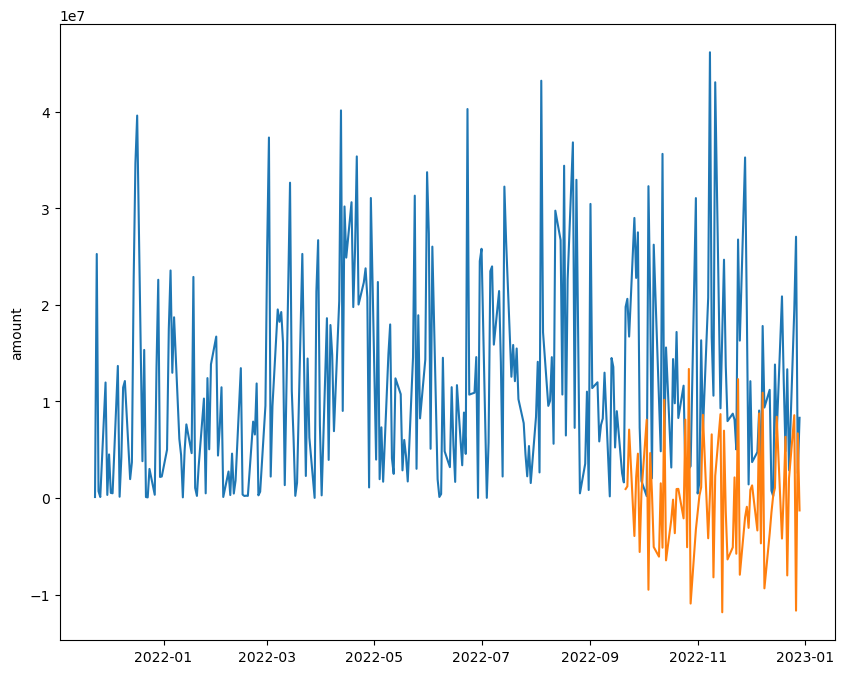

In [93]:
sns.lineplot(data=df,x=df.index,y='amount')
sns.lineplot(data=df,x=df.index,y='SARIMAX Shift_diff')

In [94]:
np.sqrt(mean_squared_error(test['shift_diff'],prediction))

17266981.68729952

In [97]:
fut=pd.DataFrame(pd.date_range(start='2022-12-30',end= '2023-03-30' ,freq='B'),columns=['Dates'])
fut.set_index('Dates',inplace=True)
fut.head()

Empty DataFrame
Columns: []
Index: [2022-12-30 00:00:00, 2023-01-02 00:00:00, 2023-01-03 00:00:00, 2023-01-04 00:00:00, 2023-01-05 00:00:00]

In [98]:
model_fit.predict(start=fut.index[0],end=fut.index[-1])

2022-12-30   -6279387.097097
2023-01-02   -5242618.128629
2023-01-03    2026572.549643
2023-01-04   -5752401.298367
2023-01-05   12046160.123413
                   ...      
2023-03-24   -6393211.129016
2023-03-27   -5337779.508599
2023-03-28    1928497.383171
2023-03-29   -5860735.298990
2023-03-30   11960655.459516
Freq: B, Name: predicted_mean, Length: 65, dtype: float64

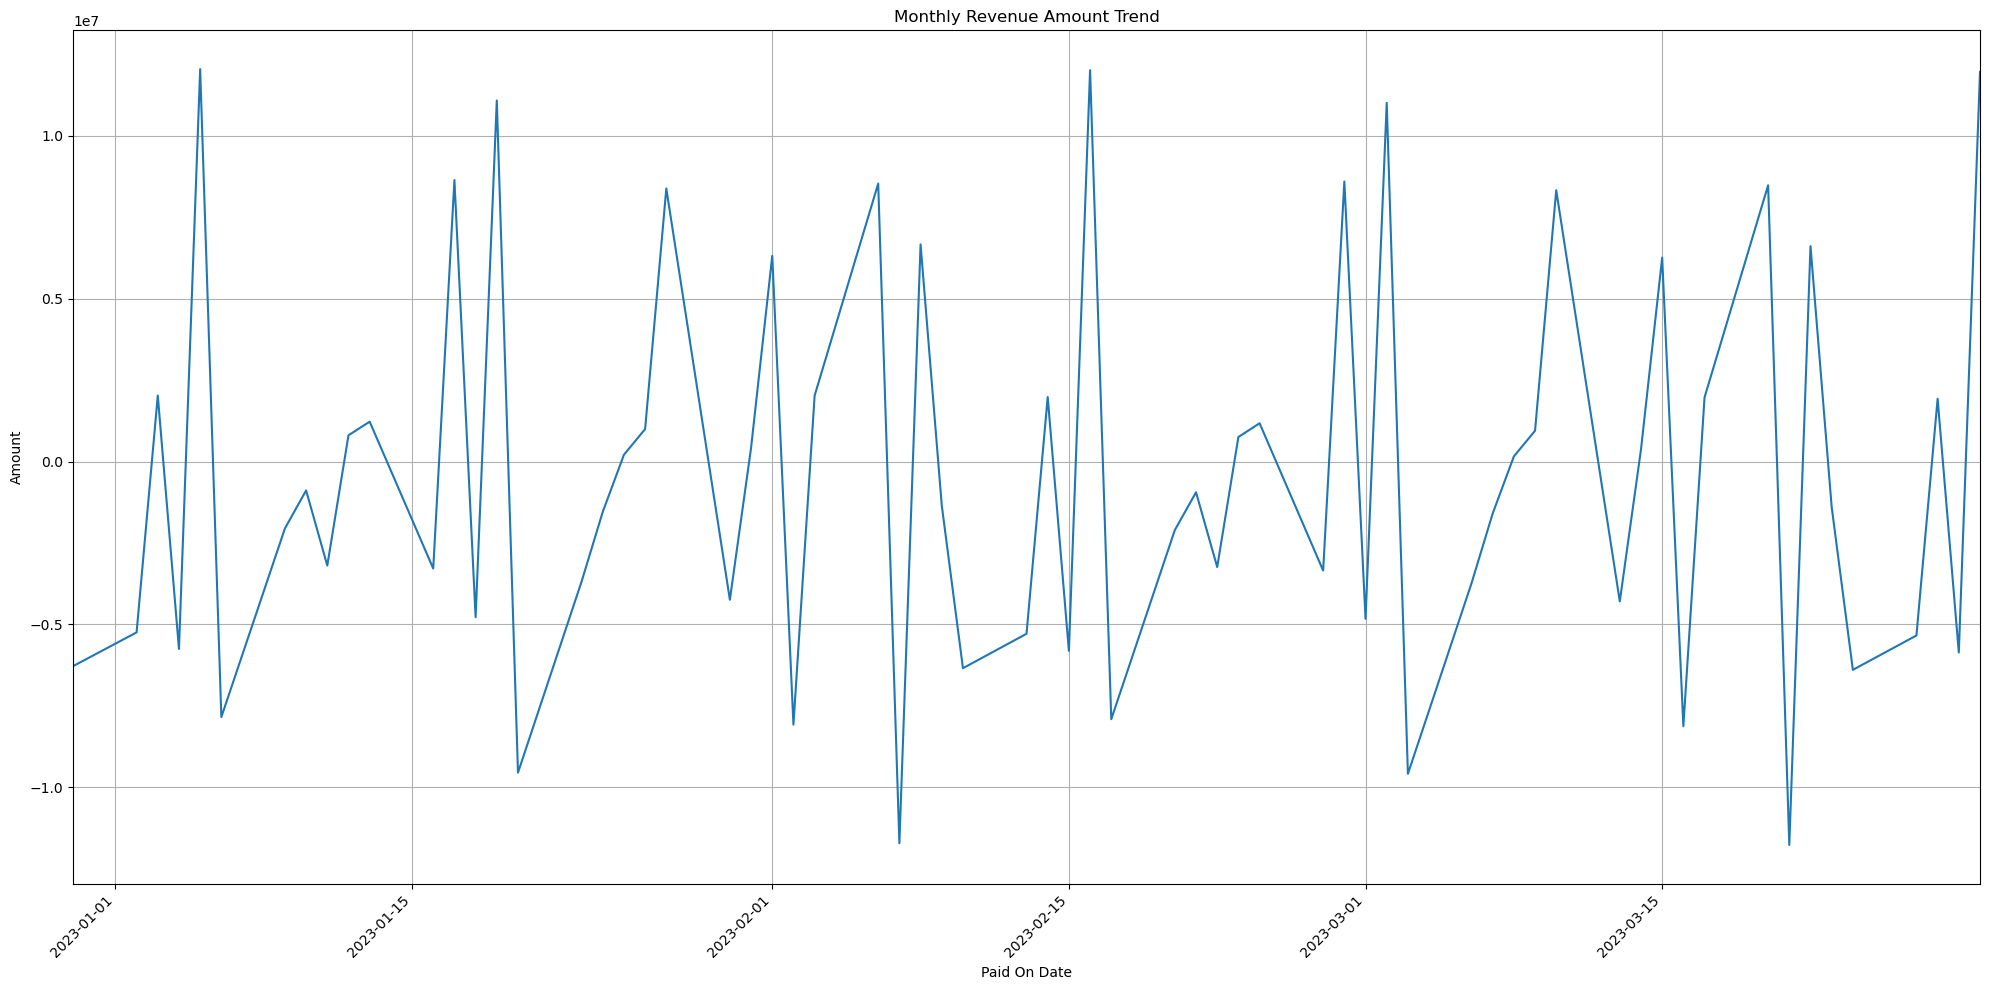

In [99]:
plot(model_fit.predict(start=fut.index[0],end=fut.index[-1]))

<AxesSubplot:ylabel='amount'>

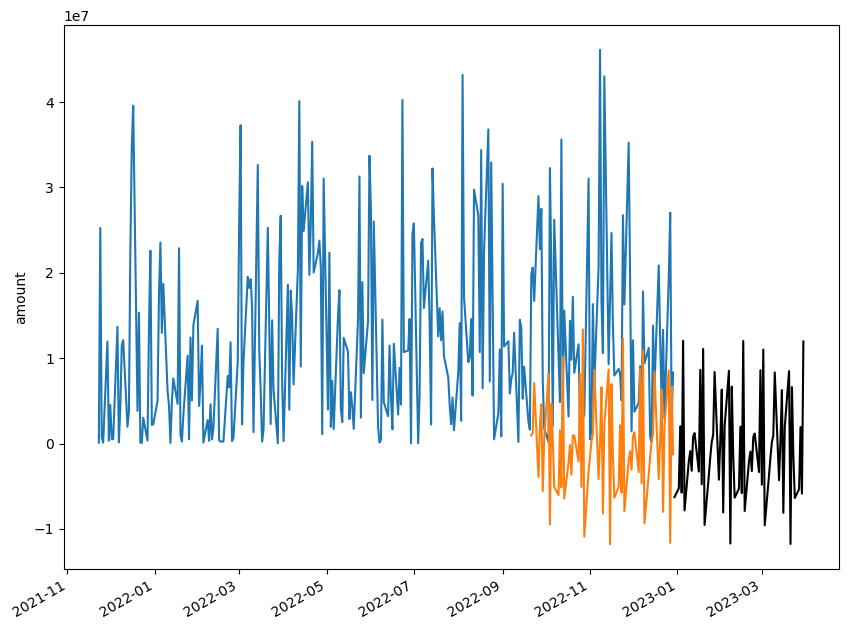

In [100]:
sns.lineplot(data=df,x=df.index,y='amount')
sns.lineplot(data=df,x=df.index,y='SARIMAX Shift_diff')
model_fit.predict(start=fut.index[0],end=fut.index[-1]).plot(color='black')

**Trying with Log->cube root transformation**

[]

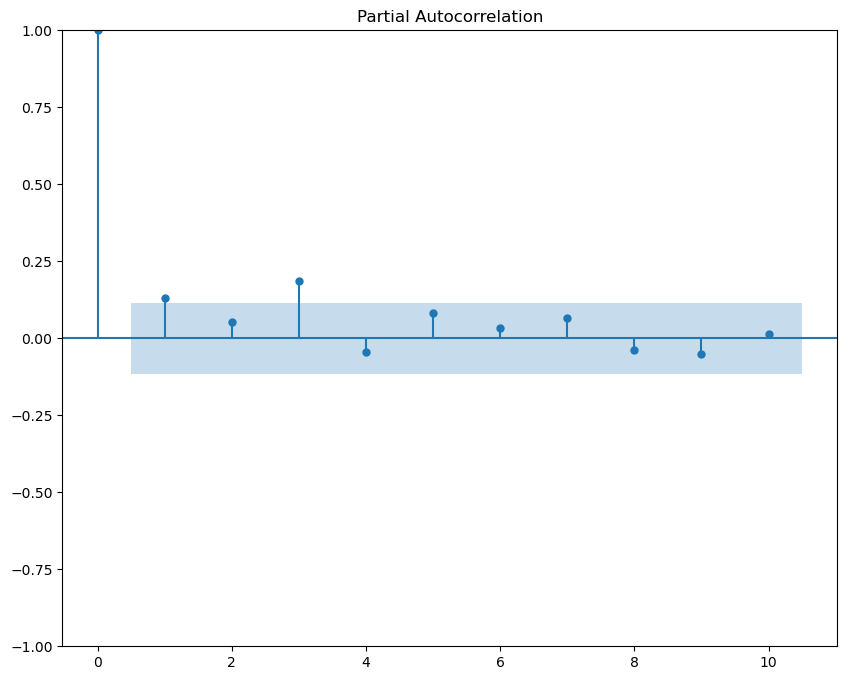

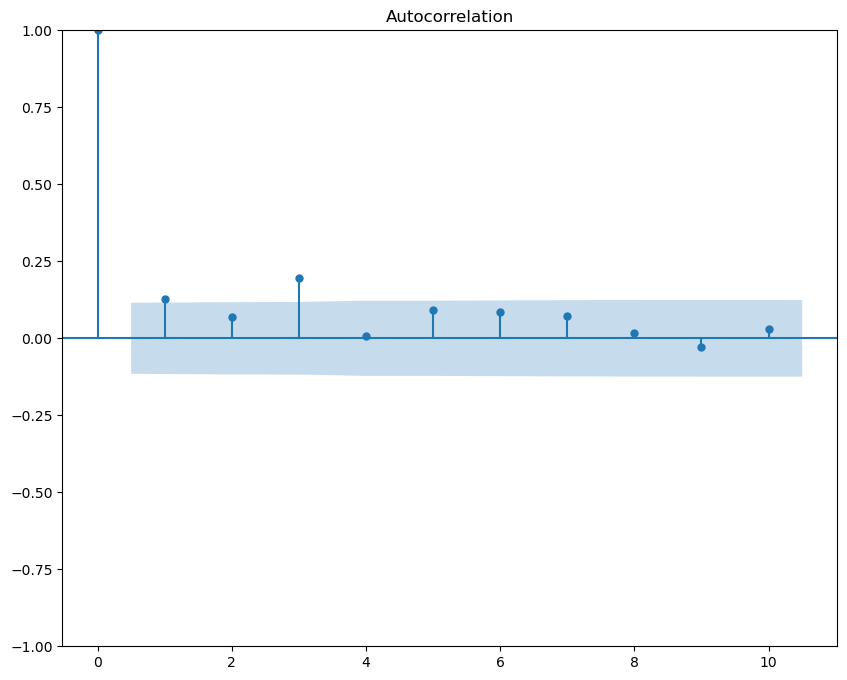

In [102]:
plot_pacf(df['lgcbrt_amount'].dropna(),lags=10)
plot_acf(df['lgcbrt_amount'].dropna(),lags=10)
plt.plot()
# p,q=3,3

In [103]:
df.head()

amount       shift_diff  lgcbrt_amount       first_diff  \
2021-11-23    111095              NaN       2.264882              NaN   
2021-11-24  25258997  25147902.000000       2.573533  25147902.000000   
2021-11-25    709552 -24549445.000000       2.379477 -24549445.000000   
2021-11-26    110585   -598967.000000       2.264583   -598967.000000   
2021-11-29  11962203  11851618.000000       2.535352  11851618.000000   

            30_diff  ARIMA Pred  SARIMAX Pred  SARIMAX Shift_diff  
2021-11-23      NaN         NaN           NaN                 NaN  
2021-11-24      NaN         NaN           NaN                 NaN  
2021-11-25      NaN         NaN           NaN                 NaN  
2021-11-26      NaN         NaN           NaN                 NaN  
2021-11-29      NaN         NaN           NaN                 NaN

In [108]:
model=SARIMAX(train['lgcbrt_amount'],order=(3,1,3),seasonal_order=(3,1,3,30))

In [109]:
model_fit=model.fit()
pred=model_fit.predict(start=test.index[0],end=test.index[-1])
df['SARIMAX Log Cuberoot']=pred

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [110]:
df.tail()

amount       shift_diff  lgcbrt_amount       first_diff  \
2022-12-23   2879833 -10451218.000000       2.459246 -10451218.000000   
2022-12-26  19488085  16608252.000000       2.560412  16608252.000000   
2022-12-27  27046719   7558634.000000       2.576970   7558634.000000   
2022-12-28   2579056 -24467663.000000       2.453151 -24467663.000000   
2022-12-29   8309358   5730302.000000       2.516314   5730302.000000   

                    30_diff     ARIMA Pred    SARIMAX Pred  \
2022-12-23 -40147387.000000 8734801.481218 15918522.346312   
2022-12-26  10196366.000000 8734801.481218 21462292.401984   
2022-12-27  10265017.000000 8734801.481218 12144709.344349   
2022-12-28 -22089681.000000 8734801.481218 21398797.856060   
2022-12-29  -5377793.000000 8734801.481218 16132361.907447   

            SARIMAX Shift_diff  SARIMAX Log Cuberoot  
2022-12-23      2060286.587614              2.558158  
2022-12-26      8578554.823474              2.572560  
2022-12-27    -11644368.256612              2.547888  
2022-12-28      6696514.206639              2.505150  
2022-12-29     -1274931.425057              2.564749

<AxesSubplot:ylabel='amount'>

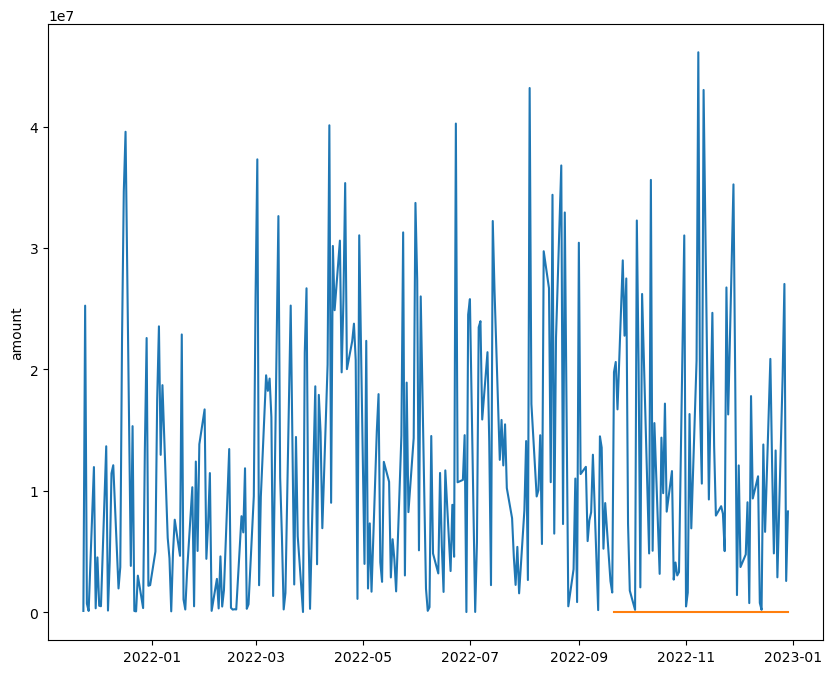

In [111]:
sns.lineplot(data=df,x=df.index,y='amount')
sns.lineplot(data=df,x=df.index,y='SARIMAX Log Cuberoot')

In [199]:
#From Above Results, Analyzing through LSTM, ARIMAX and different variations of SARIMAX 
# we will go with LSTM Trend

LSTM has multiple advantages:
Long Short-Term Memory (LSTM) models and AutoRegressive Integrated Moving Average (ARIMA) models (including SARIMAX, which includes exogenous variables) are both used for time series forecasting, but they have different characteristics and are suitable for different types of data and situations. 

Here are some advantages of LSTM over ARIMA/SARIMAX:

1. **Captures Long-Term Dependencies**
2. **Handles Non-Linear Patterns**
3. **Automatically learn Features**